In [ ]:
import csv
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.8 MB/s eta 0:00:00


In [ ]:

import csv
import pandas as pd
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
# from keras.layers.embeddings import Embedding

## Plot
# import plotly.offline as py
# import plotly.graph_objs as go
# py.init_notebook_mode(connected=True)
# import matplotlib as plt

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize



# Other
import re
import string
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn import model_selection, preprocessing, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition, ensemble
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from sklearn.svm import SVC
from keras.models import load_model
import pickle
# Sampling
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

import contractions
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping

# #wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# The code starts by importing necessary libraries, setting up Google Drive, and downloading required NLTK resources.
# It then imports additional libraries for text processing, machine learning, and handling imbalanced datasets.
# The read_bias_data function is defined to read bias data from two CSV files, drop unnecessary columns, and concatenate relevant text columns.

In [ ]:
# The label_encode function is defined to encode bias labels with numerical values for machine learning models.

In [ ]:

def read_bias_data(f1, f2):
  cols=["title", "text", "sen_obj", "source", "bias"]
  df = pd.read_csv(f1, skiprows=1, dtype=str, names=cols)
  tdf = pd.read_csv(f2, skiprows=1, dtype=str, names=cols)
  df=df.drop(["sen_obj"], 1)
  tdf=tdf.drop(["sen_obj"], 1)
  df["all"]=df.source + " " + df.title + " "+ df.text
  tdf["all"]=tdf.source + " " + tdf.title + " "+ tdf.text
  df=df.dropna()
  tdf=tdf.dropna()
  return df, tdf

def label_encode(df, tdf):
  tdf["bias"]= tdf["bias"].replace("lc", 1)
  tdf["bias"]= tdf["bias"].replace("rc", 2)
  tdf["bias"]= tdf["bias"].replace("left", 1)
  tdf["bias"]= tdf["bias"].replace("right", 2)
  tdf["bias"]= tdf["bias"].replace("least-biased",0)
  df["bias"]= df["bias"].replace("1", 1)
  df["bias"]= df["bias"].replace("2", 2)
  df["bias"]= df["bias"].replace("0", 0)
  return df, tdf

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Use get() with a default value



In [ ]:
# Two functions, get_wordnet_pos and clean_text, are defined for part-of-speech tagging and text cleaning.

In [ ]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove digits
    text = re.sub(r'\d', '', text)

    # Remove stop words
    stops = set(stopwords.words("english"))
    text = ' '.join([word for word in word_tokenize(text) if word.lower() not in stops])

    # Use BeautifulSoup to handle HTML entities
    text = BeautifulSoup(text, "html.parser").get_text()

    # Fix contractions
    text = contractions.fix(text)

    # Handle specific contractions and substitutions
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\\n", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lemmed_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(text)]
    text = " ".join(lemmed_words)

    return text


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Web mining project/clickbait_data.csv')

In [ ]:
# df = pd.read_csv("clickbait_training.csv")

In [ ]:
df

headline  clickbait
0                                     Should I Get Bings          1
1          Which TV Female Friend Group Do You Belong In          1
2      The New "Star Wars: The Force Awakens" Trailer...          1
3      This Vine Of New York On "Celebrity Big Brothe...          1
4      A Couple Did A Stunning Photo Shoot With Their...          1
...                                                  ...        ...
31995  To Make Female Hearts Flutter in Iraq, Throw a...          0
31996  British Liberal Democrat Patsy Calton, 56, die...          0
31997  Drone smartphone app to help heart attack vict...          0
31998  Netanyahu Urges Pope Benedict, in Israel, to D...          0
31999  Computer Makers Prepare to Stake Bigger Claim ...          0

[32000 rows x 2 columns]

In [ ]:
df.rename(columns={'headline': 'text'}, inplace=True)
df.rename(columns={'clickbait': 'label'}, inplace=True)

In [ ]:
df["all_cleaned"]=df["text"].apply(clean_text)

In [ ]:
df

text  label  \
0                                     Should I Get Bings      1   
1          Which TV Female Friend Group Do You Belong In      1   
2      The New "Star Wars: The Force Awakens" Trailer...      1   
3      This Vine Of New York On "Celebrity Big Brothe...      1   
4      A Couple Did A Stunning Photo Shoot With Their...      1   
...                                                  ...    ...   
31995  To Make Female Hearts Flutter in Iraq, Throw a...      0   
31996  British Liberal Democrat Patsy Calton, 56, die...      0   
31997  Drone smartphone app to help heart attack vict...      0   
31998  Netanyahu Urges Pope Benedict, in Israel, to D...      0   
31999  Computer Makers Prepare to Stake Bigger Claim ...      0   

                                             all_cleaned  
0                                              get bings  
1                          tv female friend group belong  
2          new star war force awakens trailer give chill  
3       vine new york celebrity big brother fuck perfect  
4      couple stun photo shoot baby learn inoperable ...  
...                                                  ...  
31995          make female heart flutter iraq throw shoe  
31996    british liberal democrat patsy calton dy cancer  
31997  drone smartphone app help heart attack victim ...  
31998  netanyahu urge pope benedict israel denounce iran  
31999       computer maker prepare stake big claim phone  

[32000 rows x 3 columns]

In [ ]:
# df.to_csv('/content/clickabait_data_preprocessed.csv', index=False)

In [ ]:
# Two functions, evaluate_clickbait_pip and predict_clickbait, are defined for evaluating the model and making predictions.

In [ ]:
# Test data is read, text cleaning is applied, and the evaluate_clickbait_pip function is called to assess the model's performance on the test data.

In [ ]:
tdf = pd.read_csv("/content/drive/MyDrive/Web mining project/Clickbait_testing.csv")

In [ ]:
tdf

label                                               text
0        1  "Uncover the hidden secrets to eternal happine...
1        1  "These mind-blowing weight loss hacks will tra...
2        1  "The shocking truth about celebrities' secret ...
3        1  "Discover the amazing power of positive thinki...
4        1  "You won't believe these money-making strategi...
..     ...                                                ...
194      0  "The role of education in promoting environmen...
195      0  "Analyzing the impact of social media on commu...
196      0  "Tips for effective time management for entrep...
197      0  "A comprehensive guide to understanding princi...
198      0  "The significance of renewable energy sources ...

[199 rows x 2 columns]

In [ ]:
tdf["all_cleaned"]=tdf["text"].apply(clean_text)


In [ ]:
tdf

label                                               text  \
0        1  "Uncover the hidden secrets to eternal happine...   
1        1  "These mind-blowing weight loss hacks will tra...   
2        1  "The shocking truth about celebrities' secret ...   
3        1  "Discover the amazing power of positive thinki...   
4        1  "You won't believe these money-making strategi...   
..     ...                                                ...   
194      0  "The role of education in promoting environmen...   
195      0  "Analyzing the impact of social media on commu...   
196      0  "Tips for effective time management for entrep...   
197      0  "A comprehensive guide to understanding princi...   
198      0  "The significance of renewable energy sources ...   

                                           all_cleaned  
0    uncover hidden secret eternal happiness will n...  
1    mindblowing weight loss hack transform life se...  
2    shock truth celebrity secret life reveal mustread  
3    discover amaze power positive think success li...  
4    will not believe moneymaking strategy actually...  
..                                                 ...  
194  role education promote environmental conservation  
195  analyze impact social medium community engagement  
196  tip effective time management entrepreneur bus...  
197  comprehensive guide understand principle human...  
198  significance renewable energy source address g...  

[199 rows x 3 columns]

In [ ]:
# tdf.to_csv('test_data_preprocessed.csv', index=False)

In [ ]:
!pip install newspaper3k
import newspaper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=8e462019a44d6b88179f193e90f85217ccccd02ef2eab89bc190bd4cfe39c5f2
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=396a9ff926b843d2d4a1a3558affb6dc4c7dcf5b98bf9e682935be503580b20a
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [ ]:
from newspaper import Article
def get_article(url):
  title=[]
  text=[]
  summary=[]
  data= {"title":title, "text":text, "summary":summary}
  article = Article(url, language="en") # en for English
  article.download()
  article.parse()
  article.nlp()
  print(article.title)
  title.append(article.title)
  text.append(article.text)
  summary.append(article.summary)
  data= {"title":title, "text":text, "summary":summary}
  return pd.DataFrame(data)

a=get_article("https://www.bbc.com/news/world-us-canada-52164706")

predict_clickbait(SMOTE_pipeline,a)

Michael Atkinson: Trump fires intelligence chief involved in impeachment
The article is  Non-Clickbait


In [ ]:
#Model building

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#cleaned datad
train_data = df.drop("text", axis = 1)
test_data = tdf.drop("text", axis = 1)
train_data.rename(columns={'all_cleaned': 'headline'}, inplace=True)
test_data.rename(columns={'all_cleaned': 'headline'}, inplace=True)


full_data = train_data
corpus = full_data['headline'].tolist()
labels = full_data['label'].tolist()

# Use TfidfVectorizer to convert text to TF-IDF representations
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

# Build a logistic regression model
logreg_model = LogisticRegression()

# Train the model on the entire dataset
logreg_model.fit(X_tfidf, labels)

# Separate testing data
test_corpus = test_data['headline'].tolist()
test_labels = test_data['label'].tolist()

# Use TfidfVectorizer to transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(test_corpus)

# Make predictions on the testing set
y_test_pred = logreg_model.predict(X_test_tfidf)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(test_labels, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Display additional evaluation metrics
print('\nClassification Report:')
print(classification_report(test_labels, y_test_pred))


Testing Accuracy: 0.7487

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       100
           1       0.70      0.86      0.77        99

    accuracy                           0.75       199
   macro avg       0.76      0.75      0.75       199
weighted avg       0.76      0.75      0.75       199



In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Build a Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the entire dataset
nb_model.fit(X_tfidf, labels)

# Separate testing data
test_corpus = test_data['headline'].tolist()
test_labels = test_data['label'].tolist()

# Use TfidfVectorizer to transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(test_corpus)

# Make predictions on the testing set
y_test_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(test_labels, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Display additional evaluation metrics
print('\nClassification Report:')
print(classification_report(test_labels, y_test_pred))

Testing Accuracy: 0.6884

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.45      0.59       100
           1       0.63      0.93      0.75        99

    accuracy                           0.69       199
   macro avg       0.75      0.69      0.67       199
weighted avg       0.75      0.69      0.67       199



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_tfidf, labels)
rf_predictions = rf_model.predict(X_test_tfidf)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test_pred, rf_predictions)
print("Random Forest Testing Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:")
print(classification_report(test_labels, rf_predictions))



Random Forest Testing Accuracy: 0.8341708542713567

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.35      0.48       100
           1       0.58      0.90      0.70        99

    accuracy                           0.62       199
   macro avg       0.68      0.62      0.59       199
weighted avg       0.68      0.62      0.59       199



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#cleaned datad
train_data = df.drop("text", axis = 1)
test_data = tdf.drop("text", axis = 1)
train_data.rename(columns={'all_cleaned': 'headline'}, inplace=True)
test_data.rename(columns={'all_cleaned': 'headline'}, inplace=True)


full_data = train_data
corpus = full_data['headline'].tolist()
labels = full_data['label'].tolist()

# Use TfidfVectorizer to convert text to TF-IDF representations
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_tfidf, labels)

# Feature Importance
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("Top 10 Important Features (Random Forest):")
print(df_feature_importance.head(10))

# Make predictions on the entire dataset
y_predictions = rf_model.predict(X_tfidf)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y, y_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:")
print(classification_report(y, y_predictions))


Top 10 Important Features (Random Forest):
         Feature  Importance
17115      thing    0.022451
1491          be    0.016849
12693     people    0.014395
147     actually    0.012254
9404        know    0.011790
10289       make    0.011291
17231       time    0.011052
9322        kill    0.008786
2915   character    0.008476
9883        like    0.008457

Random Forest Accuracy: 1.0

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16001
           1       1.00      1.00      1.00     15999

    accuracy                           1.00     32000
   macro avg       1.00      1.00      1.00     32000
weighted avg       1.00      1.00      1.00     32000



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Assuming 'df' is your DataFrame with 'headline' and 'label' columns
# You may need to preprocess the text before vectorization

# Cleaned data
train_data = df.drop("text", axis=1)
test_data = tdf.drop("text", axis=1)
train_data.rename(columns={'all_cleaned': 'headline'}, inplace=True)
test_data.rename(columns={'all_cleaned': 'headline'}, inplace=True)

# Combine training and testing data
full_data = pd.concat([train_data, test_data], ignore_index=True)

# Use TfidfVectorizer to convert text to TF-IDF representations
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(full_data['headline'])

# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation
# cv_accuracy = cross_val_score(rf_model, X_tfidf[:len(train_data)], train_data['label'], cv=5, scoring='accuracy')

# Make predictions on the entire dataset
y_predictions = rf_model.fit(X_tfidf[:len(train_data)], train_data['label']).predict(X_tfidf)

# Evaluate Random Forest
rf_accuracy = accuracy_score(full_data['label'], y_predictions)
# print("\nRandom Forest Accuracy (Cross-Validation):", cv_accuracy.mean())
print("\nRandom Forest Classification Report:")
print(classification_report(full_data['label'], y_predictions))

# Confusion matrix
conf_matrix = confusion_matrix(full_data['label'], y_predictions)
print('\nConfusion Matrix:')
print(conf_matrix)

# Misclassified examples
misclassified_indices = (full_data['label'] != y_predictions)
misclassified_examples = full_data.loc[misclassified_indices, ['headline', 'label']]

# Display misclassified examples
print('\nMisclassified Examples:')
print(misclassified_examples)



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16101
           1       1.00      1.00      1.00     16098

    accuracy                           1.00     32199
   macro avg       1.00      1.00      1.00     32199
weighted avg       1.00      1.00      1.00     32199


Confusion Matrix:
[[16040    61]
 [   14 16084]]

Misclassified Examples:
                                                headline  label
9503                      north south central new jersey      1
32018          master art persuasion foolproof technique      1
32020     achieve financial freedom moneysaving strategy      1
32027                   food burn fat sleep wake slimmer      1
32036                  boost energy level natural remedy      1
...                                                  ...    ...
32192   tip develop effective leadership skill workplace      0
32193  explore history cultural significance dif

In [ ]:
# --- XGBoost ---
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_tfidf, labels)
xgb_predictions = xgb_model.predict(X_test_tfidf)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(test_labels, xgb_predictions)
print("\nXGBoost Testing Accuracy:", xgb_accuracy)
print("\nXGBoost Classification Report:")
print(classification_report(test_labels, xgb_predictions))




XGBoost Testing Accuracy: 0.7236180904522613

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.96      0.78       100
           1       0.92      0.48      0.64        99

    accuracy                           0.72       199
   macro avg       0.79      0.72      0.71       199
weighted avg       0.79      0.72      0.71       199



In [ ]:
# --- LightGBM ---
lgbm_model = LGBMClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
lgbm_model.fit(X_tfidf, labels)
lgbm_predictions = lgbm_model.predict(X_test_tfidf)

# Evaluate LightGBM
lgbm_accuracy = accuracy_score(test_labels, lgbm_predictions)
print("\nLightGBM Testing Accuracy:", lgbm_accuracy)
print("\nLightGBM Classification Report:")
print(classification_report(test_labels, lgbm_predictions))


[LightGBM] [Info] Number of positive: 15999, number of negative: 16001
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.347800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47077
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 1857
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499969 -> initscore=-0.000125
[LightGBM] [Info] Start training from score -0.000125

LightGBM Testing Accuracy: 0.6884422110552764

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       100
           1       0.73      0.59      0.65        99

    accuracy                           0.69       199
   macro avg       0.70      0.69      0.68       199
weighted avg       0.70      0.69      0.69       199



In [ ]:
!pip install tensorflow

In [ ]:
#eda

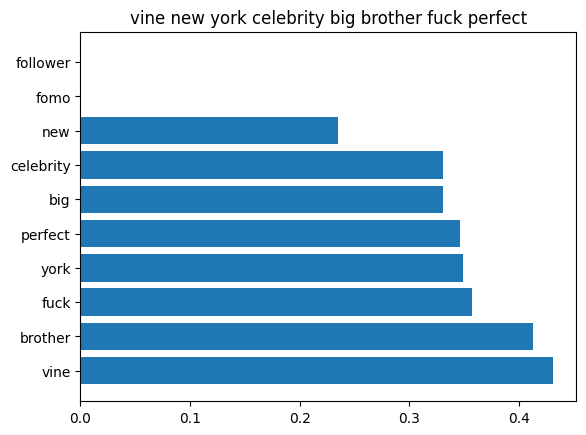

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'all_cleaned' and 'label' columns
train_data = df.drop("text", axis=1)
test_data = tdf.drop("text", axis=1)
train_data.rename(columns={'all_cleaned': 'headline'}, inplace=True)
test_data.rename(columns={'all_cleaned': 'headline'}, inplace=True)

# Concatenate train and test data
# full_data = pd.concat([train_data, test_data], ignore_index=True)
full_data = train_data

corpus = full_data['headline'].tolist()
labels = full_data['label'].tolist()

vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the data
vectorizer.fit(full_data['headline'])

# Transform the data into a tf-idf matrix
tfidf = vectorizer.transform(full_data['headline'])

# Define a function to plot the top n important words for each headline
def plot_top_words(doc_id, n):
    feature_names = np.array(vectorizer.get_feature_names_out())
    tfidf_scores = tfidf[doc_id, :].toarray()[0]
    top_words_idx = tfidf_scores.argsort()[-n:][::-1]
    top_words = feature_names[top_words_idx]
    top_scores = tfidf_scores[top_words_idx]
    fig, ax = plt.subplots()
    ax.barh(top_words, top_scores)
    ax.set_title(full_data['headline'][doc_id])
    plt.show()

# Plot the top 10 important words for the fourth headline
plot_top_words(3, 10)



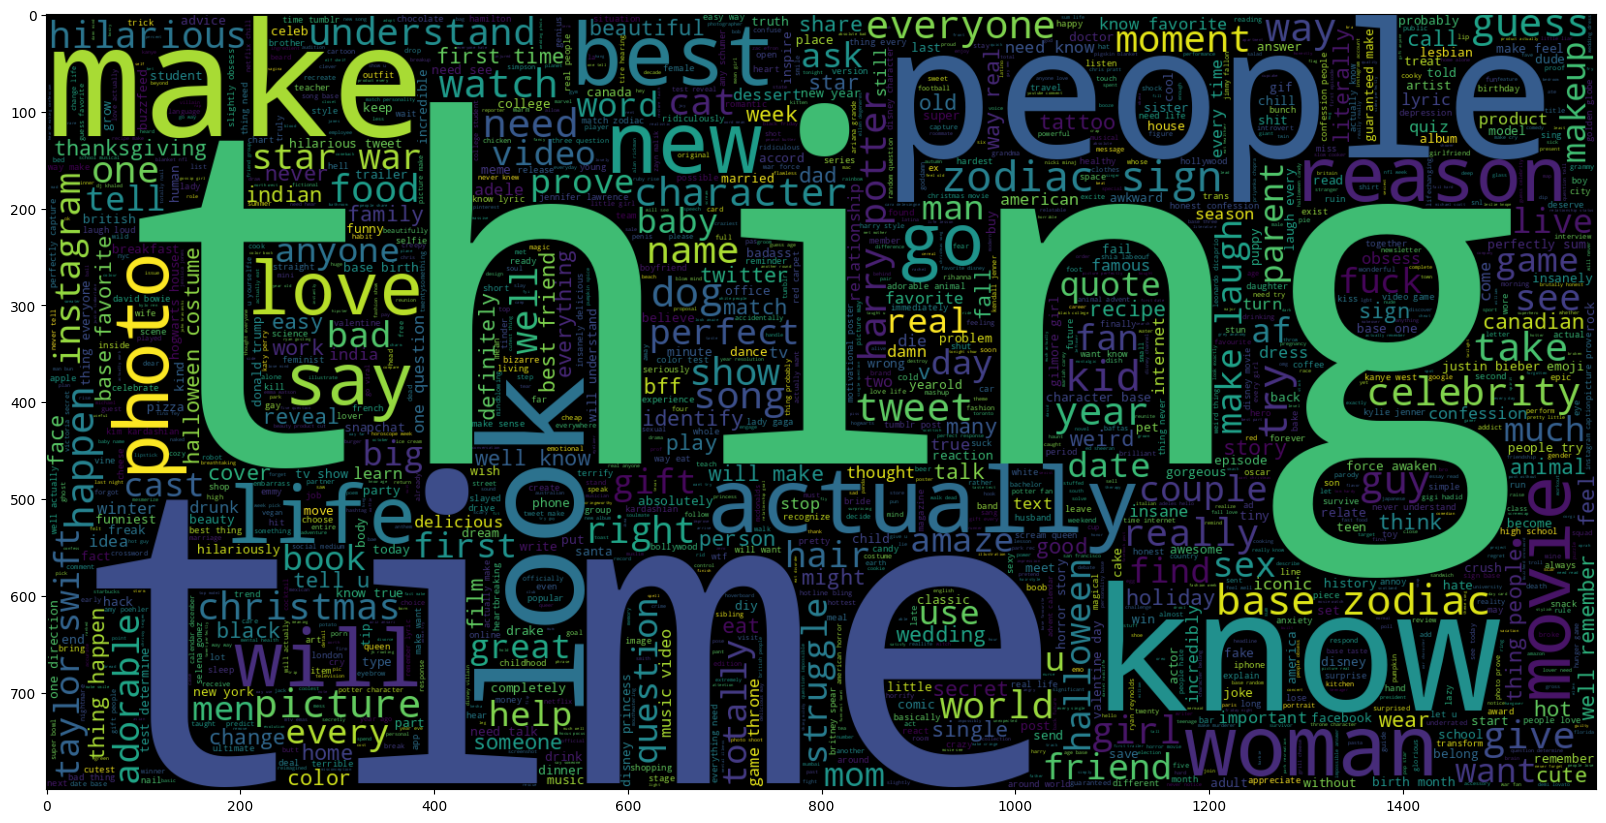

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) # Text that is ClickBait
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(train_data[full_data.label == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')
plt.grid(False)


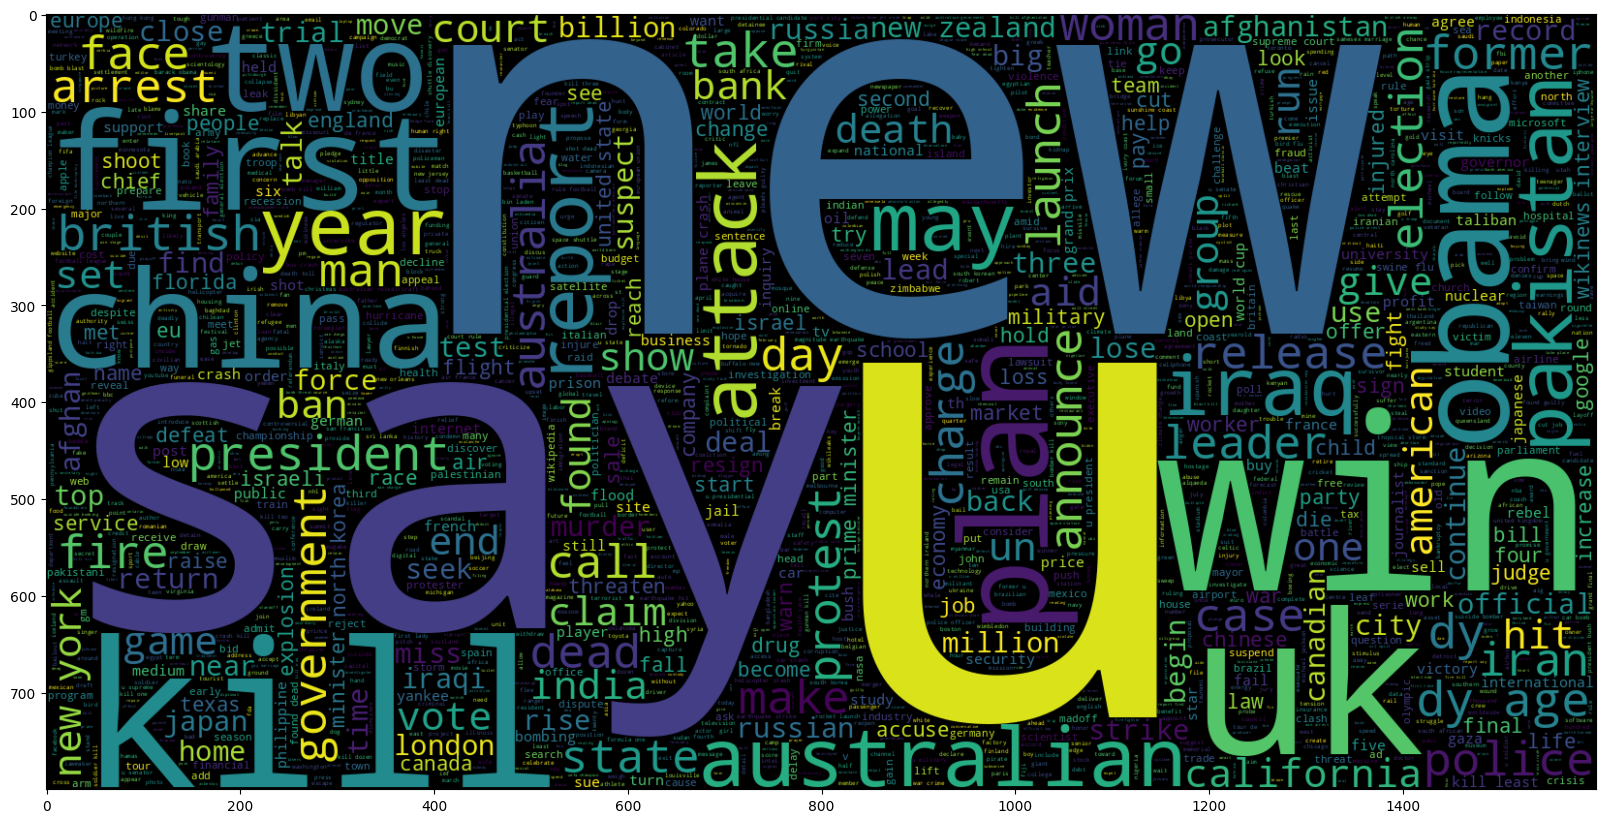

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) # Text that is ClickBait
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(train_data[full_data.label == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')
plt.grid(False)


In [ ]:
# Assuming 'df' is your DataFrame with 'all_cleaned' and 'label' columns
train_data = df.drop("text", axis=1)
test_data = tdf.drop("text", axis=1)
train_data.rename(columns={'all_cleaned': 'headline'}, inplace=True)
test_data.rename(columns={'all_cleaned': 'headline'}, inplace=True)

# Concatenate train and test data
full_data = train_data

corpus = full_data['headline'].tolist()
labels = np.array(full_data['label'])  # Convert labels to NumPy array

In [ ]:
nested_list = train_data.headline
doc_ids_clickbait = train_data[train_data.label == 1].index
doc_ids_legit = train_data[train_data.label == 0].index
nested_list_clickbait = nested_list.loc[doc_ids_clickbait]
nested_list_legit = nested_list.loc[doc_ids_legit]

flat_list_clickbait = [item for sublist in nested_list_clickbait for item in sublist]

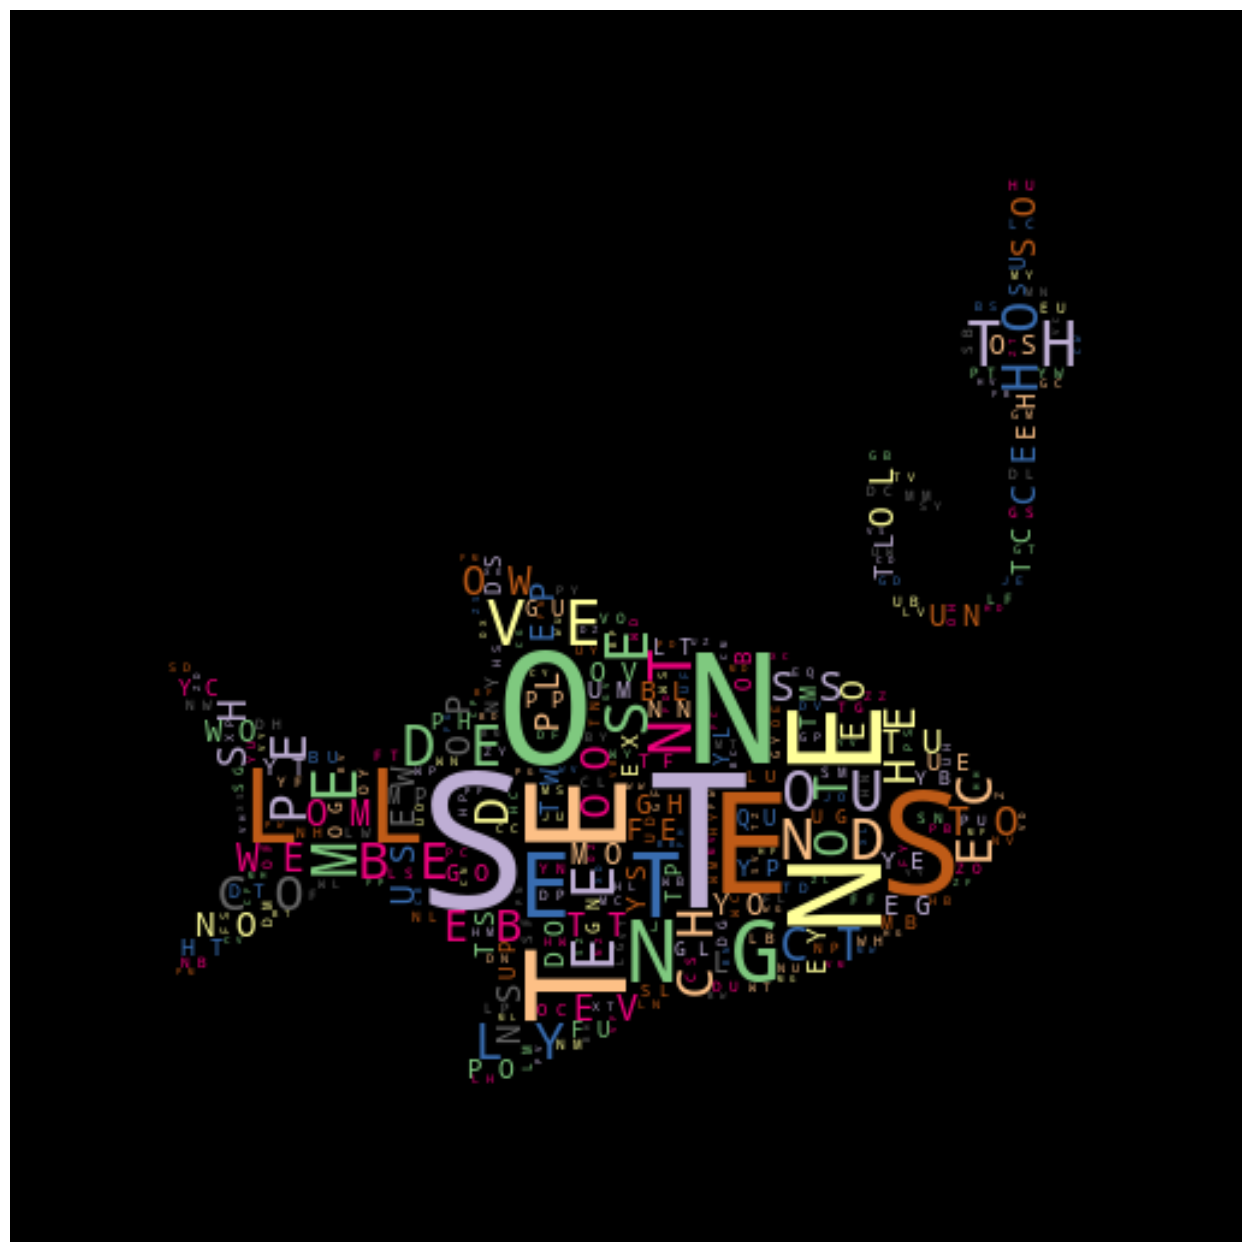

In [ ]:
from PIL import Image

icon = Image.open("/content/drive/MyDrive/Web mining project/bait.png")
image_mask = Image.new(mode="RGB", size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask)

bait_str = ' '.join(flat_list_clickbait).upper()
word_cloud =  WordCloud(mask=rgb_array, background_color="black", max_words=5000, colormap="Accent", width = 1600 , height = 800)

word_cloud.generate(bait_str)
plt.figure(figsize=[26,16])
plt.axis("off")
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

In [ ]:
#EDA

In [ ]:
# # df = pd.read_csv('/content/clickabait_data_preprocessed.csv')
# df.drop("text", axis = 1)
df.rename(columns={'all_cleaned': 'headline'}, inplace=True)

In [ ]:
df

text  label  \
0                                     Should I Get Bings      1   
1          Which TV Female Friend Group Do You Belong In      1   
2      The New "Star Wars: The Force Awakens" Trailer...      1   
3      This Vine Of New York On "Celebrity Big Brothe...      1   
4      A Couple Did A Stunning Photo Shoot With Their...      1   
...                                                  ...    ...   
31995  To Make Female Hearts Flutter in Iraq, Throw a...      0   
31996  British Liberal Democrat Patsy Calton, 56, die...      0   
31997  Drone smartphone app to help heart attack vict...      0   
31998  Netanyahu Urges Pope Benedict, in Israel, to D...      0   
31999  Computer Makers Prepare to Stake Bigger Claim ...      0   

                                                headline  
0                                              get bings  
1                          tv female friend group belong  
2          new star war force awakens trailer give chill  
3       vine new york celebrity big brother fuck perfect  
4      couple stun photo shoot baby learn inoperable ...  
...                                                  ...  
31995          make female heart flutter iraq throw shoe  
31996    british liberal democrat patsy calton dy cancer  
31997  drone smartphone app help heart attack victim ...  
31998  netanyahu urge pope benedict israel denounce iran  
31999       computer maker prepare stake big claim phone  

[32000 rows x 3 columns]

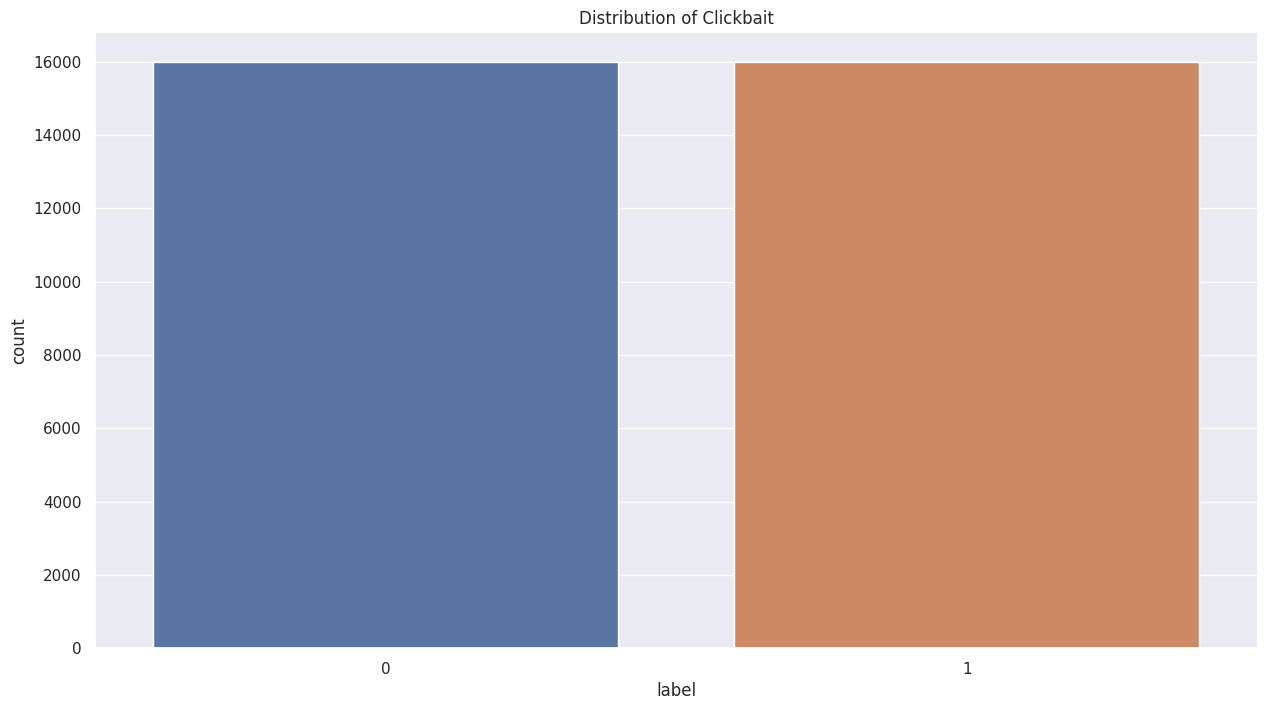

In [ ]:
sns.set()
plt.figure(figsize=(15,8))
sns.countplot(x='label',data=df)
plt.title("Distribution of Clickbait")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine clickbait and non-clickbait text for TF-IDF analysis
all_text = df['headline']

# Use TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(all_text)

# Display the most important words for clickbait and non-clickbait
feature_names = tfidf_vectorizer.get_feature_names_out()
clickbait_tfidf = tfidf_matrix[df['label'] == 1].sum(axis=0).A1
non_clickbait_tfidf = tfidf_matrix[df['label'] == 0].sum(axis=0).A1

# Get indices of the top N important words
top_n = 10
clickbait_top_tfidf_indices = clickbait_tfidf.argsort()[-top_n:][::-1]
non_clickbait_top_tfidf_indices = non_clickbait_tfidf.argsort()[-top_n:][::-1]

# Display top N important words
print("Top 10 Clickbait TF-IDF Words:")
for idx in clickbait_top_tfidf_indices:
    print(feature_names[idx])

print("\nTop 10 Non-Clickbait TF-IDF Words:")
for idx in non_clickbait_top_tfidf_indices:
    print(feature_names[idx])


Top 10 Clickbait TF-IDF Words:
thing
make
know
people
time
actually
base
need
like
best

Top 10 Non-Clickbait TF-IDF Words:
kill
new
win
dy
dead
say
president
uk
crash
australian


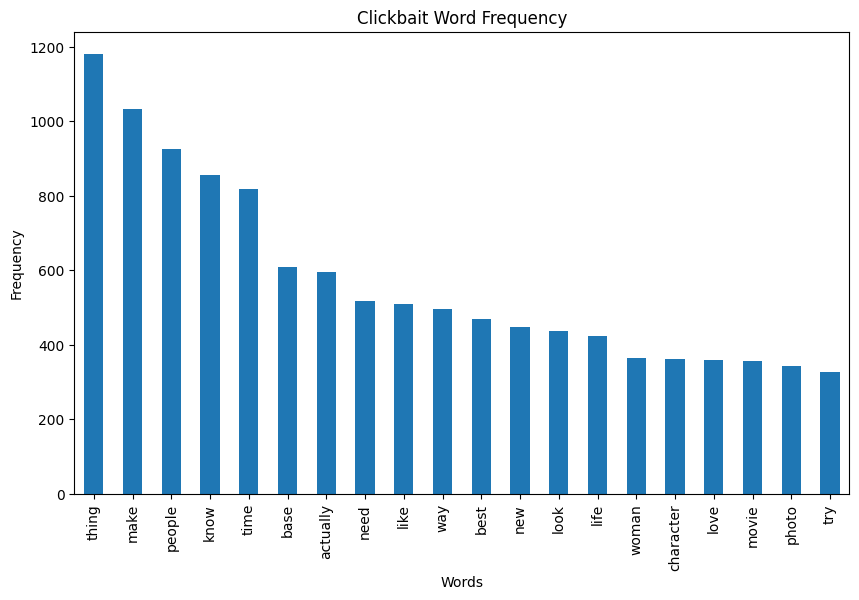

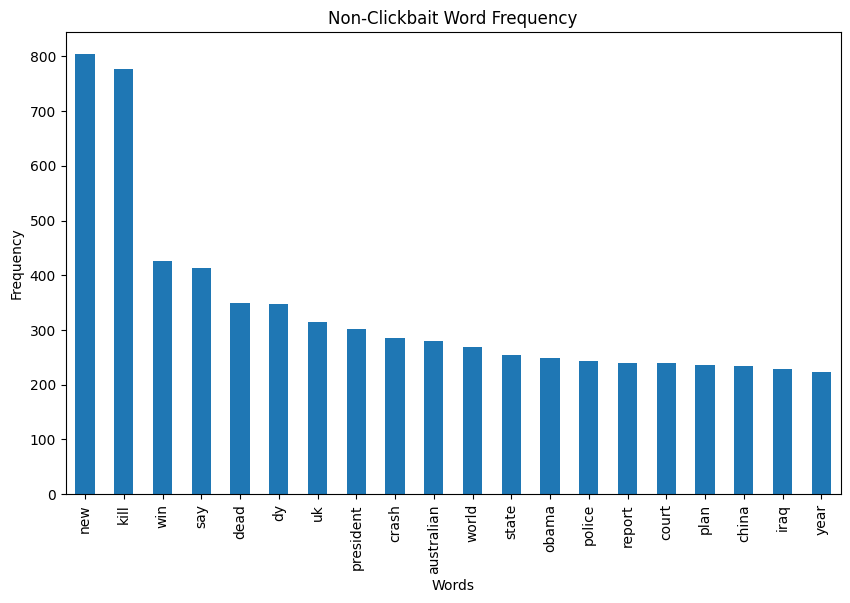

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'df' is your DataFrame with 'text' and 'label' columns
clickbait_data = df[df['label'] == 1]['headline']
non_clickbait_data = df[df['label'] == 0]['headline']

# Convert text data to strings
clickbait_text = ' '.join(clickbait_data.astype(str))
non_clickbait_text = ' '.join(non_clickbait_data.astype(str))

# Function to plot word frequencies
def plot_word_frequency(text, title):
    # Use CountVectorizer to get word frequencies
    vectorizer = CountVectorizer(stop_words='english')
    word_freq = vectorizer.fit_transform([text])
    word_freq = pd.DataFrame(word_freq.toarray(), columns=vectorizer.get_feature_names_out())

    # Sum word frequencies across all documents
    word_freq_sum = word_freq.sum(axis=0).sort_values(ascending=False)

    # Plot the top 20 words
    plt.figure(figsize=(10, 6))
    word_freq_sum.head(20).plot(kind='bar')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Plot word frequencies for clickbait headlines
plot_word_frequency(clickbait_text, 'Clickbait Word Frequency')

# Plot word frequencies for non-clickbait headlines
plot_word_frequency(non_clickbait_text, 'Non-Clickbait Word Frequency')


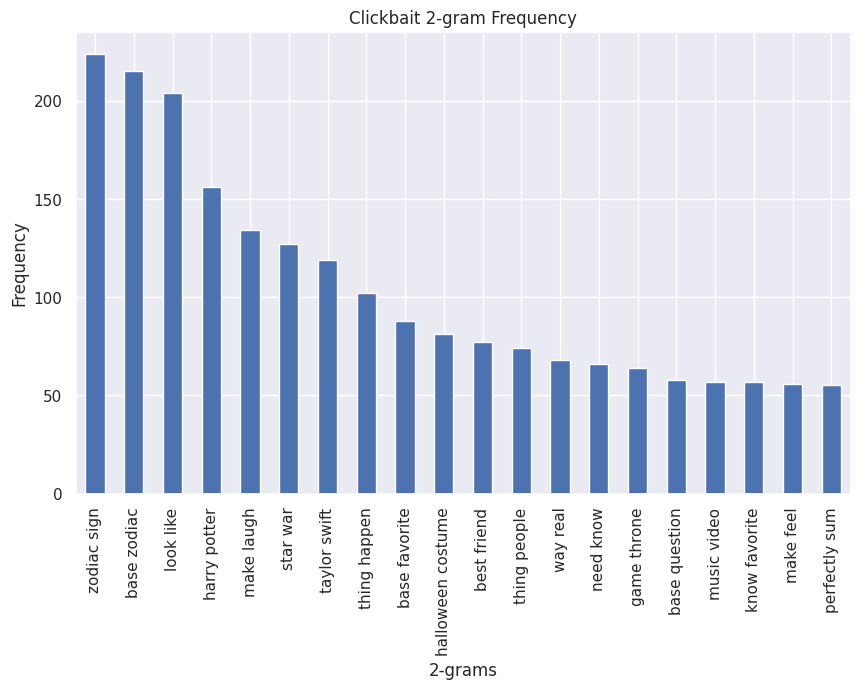

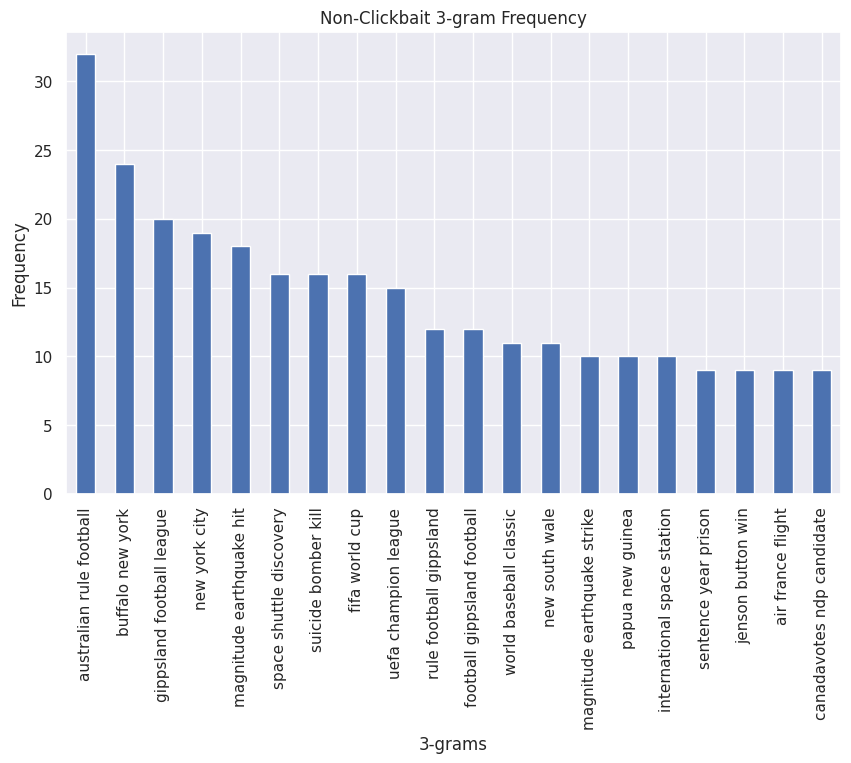

In [ ]:
# Function to plot bigram and trigram frequencies
def plot_ngram_frequency(text, title, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_freq = vectorizer.fit_transform([text])
    ngram_freq = pd.DataFrame(ngram_freq.toarray(), columns=vectorizer.get_feature_names_out())

    # Sum n-gram frequencies across all documents
    ngram_freq_sum = ngram_freq.sum(axis=0).sort_values(ascending=False)

    # Plot the top 20 n-grams
    plt.figure(figsize=(10, 6))
    ngram_freq_sum.head(20).plot(kind='bar')
    plt.title(f'{title} {n}-gram Frequency')
    plt.xlabel(f'{n}-grams')
    plt.ylabel('Frequency')
    plt.show()

# Plot bigram frequencies for clickbait headlines
plot_ngram_frequency(clickbait_text, 'Clickbait', n=2)

# Plot trigram frequencies for non-clickbait headlines
plot_ngram_frequency(non_clickbait_text, 'Non-Clickbait', n=3)


Top 10 Clickbait N-grams:
[('here be', 423), ('you be', 299), ('you will', 245), ('do not', 228), ('zodiac sign', 224), ('base zodiac', 215), ('look like', 200), ('what be', 199), ('harry potter', 156), ('that will', 142)]

Top 10 Non-Clickbait N-grams:
[('dy age', 174), ('new york', 118), ('new zealand', 107), ('wikinews interview', 87), ('north korea', 73), ('prime minister', 69), ('united state', 68), ('kill least', 59), ('plane crash', 57), ('world cup', 56)]


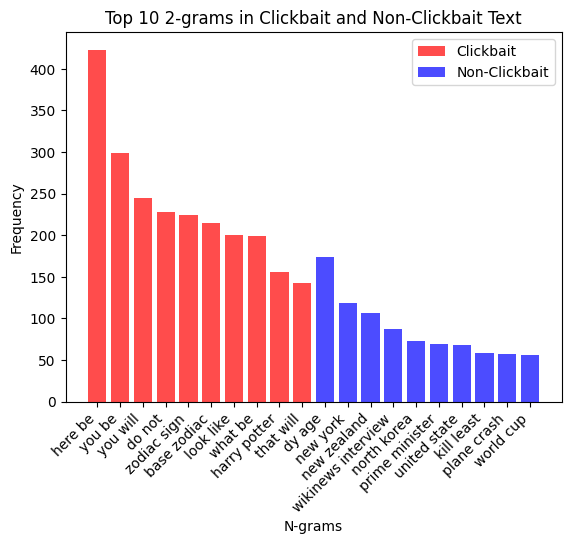

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter

# Assuming you have a DataFrame 'df' with 'text' and 'labels' columns
clickbait_data = df[df['label'] == 1]['headline']
non_clickbait_data = df[df['label'] == 0]['headline']

# Combine clickbait and non-clickbait text for analysis
all_text = df['text']

# Function to generate N-grams
def get_ngrams(text, n):
    if pd.notnull(text):  # Check if the value is not NaN
        tokens = text.split()
        n_grams = ngrams(tokens, n)
        return [' '.join(gram) for gram in n_grams]
    else:
        return []

# Extract N-grams for clickbait and non-clickbait text
n = 2  # You can change this value to explore different N-gram sizes
clickbait_ngrams = [gram for text in clickbait_data for gram in get_ngrams(text, n)]
non_clickbait_ngrams = [gram for text in non_clickbait_data for gram in get_ngrams(text, n)]
all_ngrams = [gram for text in all_text for gram in get_ngrams(text, n)]

# Count the occurrences of N-grams
clickbait_counts = Counter(clickbait_ngrams)
non_clickbait_counts = Counter(non_clickbait_ngrams)
all_counts = Counter(all_ngrams)

# Display the most common N-grams for clickbait and non-clickbait
print("Top 10 Clickbait N-grams:")
print(clickbait_counts.most_common(10))

print("\nTop 10 Non-Clickbait N-grams:")
print(non_clickbait_counts.most_common(10))

# Visualization (Optional)
clickbait_top_ngrams = dict(clickbait_counts.most_common(10))
non_clickbait_top_ngrams = dict(non_clickbait_counts.most_common(10))

plt.bar(clickbait_top_ngrams.keys(), clickbait_top_ngrams.values(), alpha=0.7, label='Clickbait', color='r')
plt.bar(non_clickbait_top_ngrams.keys(), non_clickbait_top_ngrams.values(), alpha=0.7, label='Non-Clickbait', color='b')
plt.xlabel('N-grams')
plt.ylabel('Frequency')
plt.title(f'Top 10 {n}-grams in Clickbait and Non-Clickbait Text')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.legend()
plt.show()


In [ ]:
# Function to calculate linguistic features
def calculate_linguistic_features(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    words = [token for token in doc if token.is_alpha]

    avg_sentence_length = len(words) / len(sentences) if len(sentences) > 0 else 0
    avg_word_length = sum(len(token) for token in words) / len(words) if len(words) > 0 else 0

    return avg_sentence_length, avg_word_length

# Apply the function to the entire dataset
df[['avg_sentence_length', 'avg_word_length']] = df['text'].apply(calculate_linguistic_features).apply(pd.Series)

# Display the summary statistics for linguistic features
print(df.groupby('label').agg({'avg_sentence_length': 'mean', 'avg_word_length': 'mean'}))


Exception ignored in: <function _xla_gc_callback at 0x7bf6a92c9090>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


       avg_sentence_length  avg_word_length
label                                      
0                 7.916016         5.469569
1                 8.939177         4.763841


In [ ]:
from scipy.stats import ttest_ind
# Conduct statistical tests (e.g., t-tests or Mann-Whitney U tests) to determine if there are significant differences in linguistic features between clickbait and non-clickbait headlines.
# Separate data into clickbait and non-clickbait
clickbait_data = df[df['label'] == 1]
non_clickbait_data = df[df['label'] == 0]

# Perform t-test for avg_sentence_length
t_stat_sentence, p_value_sentence = ttest_ind(clickbait_data['avg_sentence_length'], non_clickbait_data['avg_sentence_length'])
print(f'Test for avg_sentence_length - t-statistic: {t_stat_sentence}, p-value: {p_value_sentence}')

# Perform t-test for avg_word_length
t_stat_word, p_value_word = ttest_ind(clickbait_data['avg_word_length'], non_clickbait_data['avg_word_length'])
print(f'Test for avg_word_length - t-statistic: {t_stat_word}, p-value: {p_value_word}')


Test for avg_sentence_length - t-statistic: 35.79086917118001, p-value: 4.143009393568098e-275
Test for avg_word_length - t-statistic: -72.28339273765197, p-value: 0.0


In [ ]:
# The t-tests you've conducted are statistical tests that assess whether there are significant differences between the means of two groups. In your case, the two groups are clickbait headlines and non-clickbait headlines, and you're comparing their linguistic features (avg_sentence_length and avg_word_length).

# Here's an explanation of the results:

# avg_sentence_length:

# t-statistic: 35.79
# p-value: 4.14e-275 (very close to zero)
# The t-statistic measures how many standard deviations the sample mean of the group differs from the population mean. A larger t-statistic indicates a more significant difference. In this case, the t-statistic is quite large (35.79), suggesting a substantial difference in average sentence length between clickbait and non-clickbait headlines.

# The p-value is the probability of observing such an extreme t-statistic if the null hypothesis were true (i.e., there is no difference between groups). With a p-value close to zero, you would typically reject the null hypothesis. Therefore, there is strong evidence that the average sentence lengths are significantly different between clickbait and non-clickbait headlines.

# avg_word_length:

# t-statistic: -72.28
# p-value: 0.0
# Similar to the explanation above, the t-statistic for avg_word_length is substantial in magnitude (-72.28), indicating a significant difference in average word length between the two groups.

# The p-value being close to zero suggests strong evidence against the null hypothesis. Therefore, you would reject the null hypothesis and conclude that there is a significant difference in average word lengths between clickbait and non-clickbait headlines.

# In summary, both t-tests indicate highly significant differences in linguistic features between clickbait and non-clickbait headlines. The negative t-statistic for avg_word_length suggests that, on average, words in non-clickbait headlines are shorter than those in clickbait headlines.

In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame with 'text' and 'label' columns
# You may need to install the 'textblob' library using: pip install textblob
# You may also need to install 'tensorflow' if you haven't already: pip install tensorflow

# Separate features and labels
X = df['headline']
y = df['label']

# Replace missing values in 'X' with an empty string
X = X.fillna('')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer
max_features = 5000  # You can adjust this value based on your dataset
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# Build a simple neural network for sentiment analysis
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=max_features))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tfidf, y_train, epochs=10, batch_size=512)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test_tfidf)
y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]

# Display additional evaluation metrics
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Classification report for the testing set
print('\nClassification Report (Testing Set):')
print(classification_report(y_test, y_test_pred_binary))


Epoch 1/10
50/50 [==============================] - 5s 53ms/step - loss: 0.6057 - accuracy: 0.8814
Epoch 2/10
50/50 [==============================] - 3s 54ms/step - loss: 0.3727 - accuracy: 0.9524
Epoch 3/10
50/50 [==============================] - 2s 37ms/step - loss: 0.2246 - accuracy: 0.9605
Epoch 4/10
50/50 [==============================] - 2s 39ms/step - loss: 0.1575 - accuracy: 0.9639
Epoch 5/10
50/50 [==============================] - 1s 27ms/step - loss: 0.1245 - accuracy: 0.9680
Epoch 6/10
50/50 [==============================] - 1s 22ms/step - loss: 0.1052 - accuracy: 0.9713
Epoch 7/10
50/50 [==============================] - 1s 22ms/step - loss: 0.0923 - accuracy: 0.9734
Epoch 8/10
50/50 [==============================] - 1s 22ms/step - loss: 0.0830 - accuracy: 0.9759
Epoch 9/10
50/50 [==============================] - 1s 27ms/step - loss: 0.0758 - accuracy: 0.9772
Epoch 10/10
200/200 [==============================] - 1s 4ms/step
Test Accuracy: 0.9567

Classification Repo

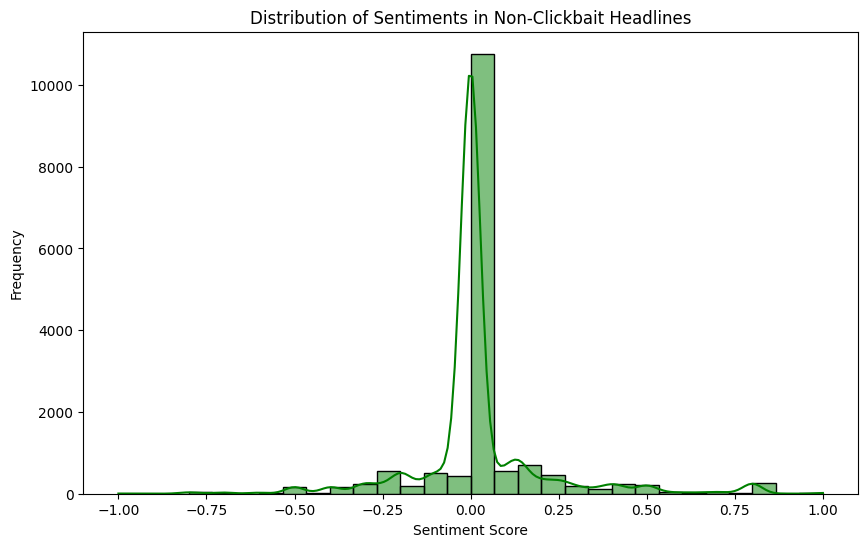

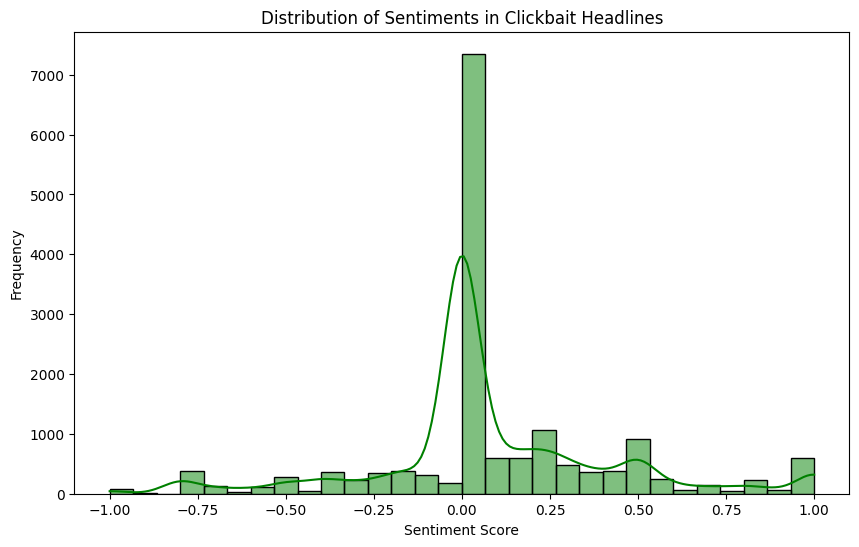

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with text data
# If you haven't imported these libraries earlier, you may need to install them using:
# pip install pandas textblob matplotlib seaborn

# Example: Calculate sentiment scores using TextBlob
df['sentiment'] = df['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Filter the dataframe for label = 0 (non-clickbait)
non_clickbait_df = df[df['label'] == 0]

# Plot the distribution of sentiments for non-clickbait headlines
plt.figure(figsize=(10, 6))
sns.histplot(non_clickbait_df['sentiment'], bins=30, kde=True, color='green')
plt.title('Distribution of Sentiments in Non-Clickbait Headlines')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Filter the dataframe for label = 1 (clickbait)
clickbait_df = df[df['label'] == 1]

# Plot the distribution of sentiments for clickbait headlines
plt.figure(figsize=(10, 6))
sns.histplot(clickbait_df['sentiment'], bins=30, kde=True, color='green')
plt.title('Distribution of Sentiments in Clickbait Headlines')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(clickbait_df['sentiment'], non_clickbait_df['sentiment'])

# Check significance
if p_value < 0.05:
    print(f"Statistically significant difference in sentiment (p-value: {p_value:.4f})")
else:
    print(f"No significant difference in sentiment (p-value: {p_value:.4f})")


Statistically significant difference in sentiment (p-value: 0.0000)


<Axes: xlabel='sentiment', ylabel='Count'>

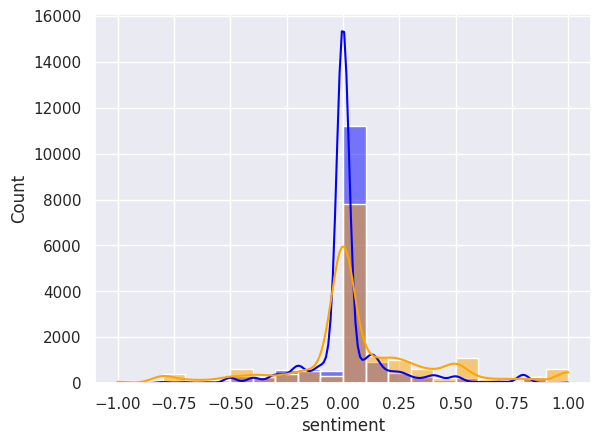

In [ ]:
# Experiment with different bin sizes
sns.histplot(non_clickbait_df['sentiment'], bins=20, kde=True, color='blue', label='Non-Clickbait')
sns.histplot(clickbait_df['sentiment'], bins=20, kde=True, color='orange', label='Clickbait')



<Axes: xlabel='sentiment', ylabel='Count'>

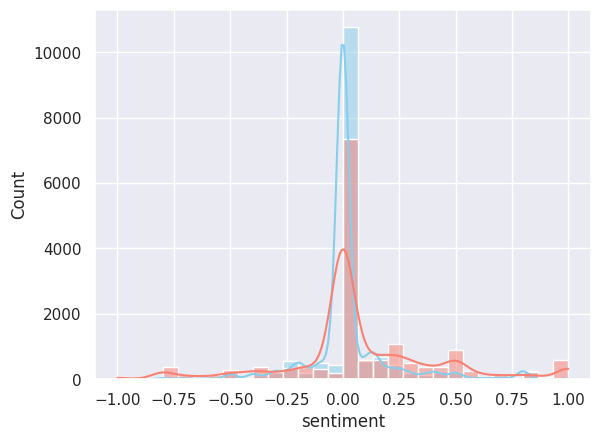

In [ ]:
# Experiment with color palette
sns.histplot(non_clickbait_df['sentiment'], bins=30, kde=True, color='skyblue', label='Non-Clickbait')
sns.histplot(clickbait_df['sentiment'], bins=30, kde=True, color='salmon', label='Clickbait')


In [ ]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import textstat

# Assuming 'df' is your DataFrame with 'text' and 'label' columns
# You may need to install the 'textstat' library using: pip install textstat

# Remove NaN values from the 'headline' column
df = df.dropna(subset=['headline'])

# Add columns for readability metrics
df['flesch_kincaid_grade'] = df['headline'].apply(lambda x: textstat.flesch_kincaid_grade(str(x)) if pd.notnull(x) else None)
df['gunning_fog'] = df['headline'].apply(lambda x: textstat.gunning_fog(str(x)) if pd.notnull(x) else None)
df['coleman_liau'] = df['headline'].apply(lambda x: textstat.coleman_liau_index(str(x)) if pd.notnull(x) else None)

# Separate into clickbait and non-clickbait
clickbait_df = df[df['label'] == 1]
non_clickbait_df = df[df['label'] == 0]

# Display the calculated readability metrics for clickbait headlines
print("Clickbait Readability Metrics:")
print(clickbait_df[['headline', 'flesch_kincaid_grade', 'gunning_fog', 'coleman_liau']])

# Display the calculated readability metrics for non-clickbait headlines
print("\nNon-Clickbait Readability Metrics:")
print(non_clickbait_df[['headline', 'flesch_kincaid_grade', 'gunning_fog', 'coleman_liau']])

# Calculate and display the average readability metrics for clickbait headlines
clickbait_avg_metrics = clickbait_df[['flesch_kincaid_grade', 'gunning_fog', 'coleman_liau']].mean()
print("\nAverage Readability Metrics for Clickbait Headlines:")
print(clickbait_avg_metrics)

# Calculate and display the average readability metrics for non-clickbait headlines
non_clickbait_avg_metrics = non_clickbait_df[['flesch_kincaid_grade', 'gunning_fog', 'coleman_liau']].mean()
print("\nAverage Readability Metrics for Non-Clickbait Headlines:")
print(non_clickbait_avg_metrics)


Clickbait Readability Metrics:
                                                headline  \
0                                              get bings   
1                          tv female friend group belong   
2          new star war force awakens trailer give chill   
3       vine new york celebrity big brother fuck perfect   
4      couple stun photo shoot baby learn inoperable ...   
...                                                  ...   
15994                mini sisterhood travel pant reunion   
15995                           dog thankful best friend   
15996             people prove dick big drop condom head   
15997                                  i be atheist i be   
15998  artist drew disney men justin bieber outcome g...   

       flesch_kincaid_grade  gunning_fog  coleman_liau  
0                      -3.1         0.80         -7.41  
1                       2.9         2.00          7.28  
2                       2.9         3.20          7.90  
3                   

In [ ]:
from scipy.stats import ttest_ind

# Perform t-test for Flesch-Kincaid Grade Level
statistic_fk, p_value_fk = ttest_ind(clickbait_df['flesch_kincaid_grade'].dropna(), non_clickbait_df['flesch_kincaid_grade'].dropna())

# Perform t-test for Gunning Fog Index
statistic_gf, p_value_gf = ttest_ind(clickbait_df['gunning_fog'].dropna(), non_clickbait_df['gunning_fog'].dropna())

# Perform t-test for Coleman Liau Index
statistic_cl, p_value_cl = ttest_ind(clickbait_df['coleman_liau'].dropna(), non_clickbait_df['coleman_liau'].dropna())

# Check significance
alpha = 0.05
if p_value_fk < alpha:
    print("Statistically significant difference in Flesch-Kincaid Grade Level : ", p_value_fk)
else:
    print("No significant difference in Flesch-Kincaid Grade Level: ", p_value_fk)



Statistically significant difference in Flesch-Kincaid Grade Level :  1.5374670487129924e-162


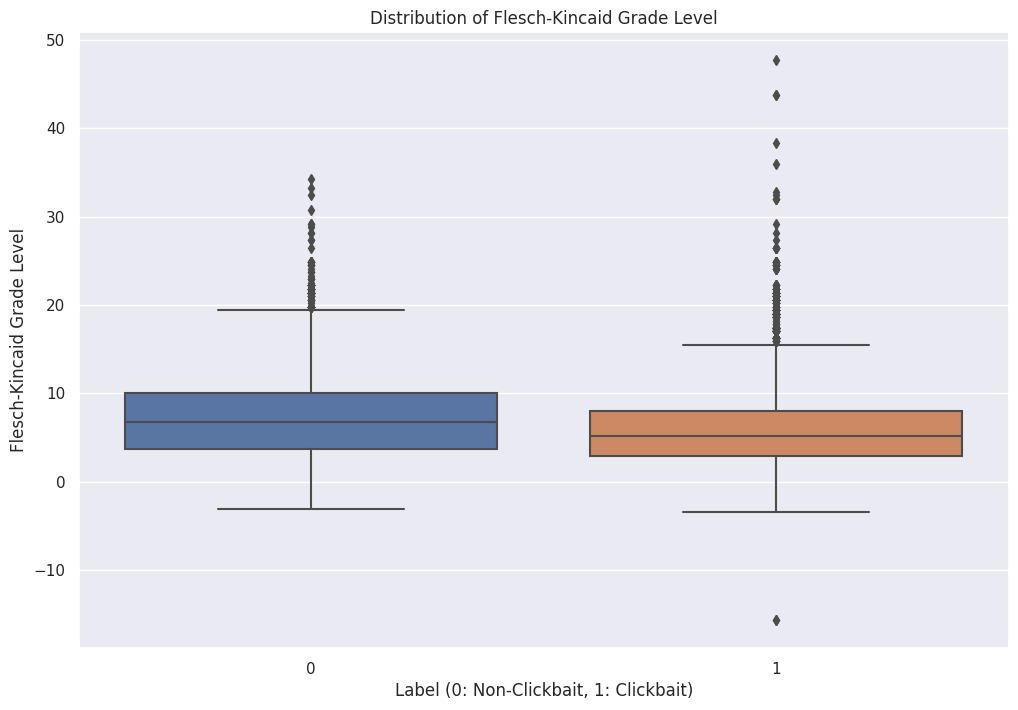

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Flesch-Kincaid Grade Level
plt.figure(figsize=(12, 8))
sns.boxplot(x='label', y='flesch_kincaid_grade', data=df)
plt.title('Distribution of Flesch-Kincaid Grade Level')
plt.xlabel('Label (0: Non-Clickbait, 1: Clickbait)')
plt.ylabel('Flesch-Kincaid Grade Level')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Assuming 'df' is your DataFrame with 'text' and 'label' columns

# Drop rows with missing values in the 'headline' column
df = df.dropna(subset=['headline'])

# Separate into clickbait and non-clickbait
clickbait_df = df[df['label'] == 1]
non_clickbait_df = df[df['label'] == 0]

# Combine text data for each category into a list
clickbait_texts = clickbait_df['headline'].tolist()
non_clickbait_texts = non_clickbait_df['headline'].tolist()

# Function to apply topic modeling
def apply_topic_modeling(texts, num_topics=5):
    vectorizer = CountVectorizer(max_df=0.85, max_features=1000, stop_words='english')
    term_matrix = vectorizer.fit_transform(texts)

    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(term_matrix)

    feature_names = vectorizer.get_feature_names_out()

    # Display top words for each topic
    for i, topic in enumerate(lda.components_):
        print(f"Topic #{i + 1}:")
        print([feature_names[j] for j in topic.argsort()[-10:]])
        print("\n")

    return lda

# Apply topic modeling for clickbait content
print("Clickbait Topics:")
clickbait_lda = apply_topic_modeling(clickbait_texts)

# Apply topic modeling for non-clickbait content
print("Non-Clickbait Topics:")
non_clickbait_lda = apply_topic_modeling(non_clickbait_texts)


Clickbait Topics:
Topic #1:
['harry', 'dog', 'really', 'halloween', 'look', 'say', 'photo', 'like', 'thing', 'life']


Topic #2:
['thing', 'celebrity', 'feel', 'cat', 'hilarious', 'laugh', 'tweet', 'time', 'people', 'make']


Topic #3:
['watch', 'video', 'actually', 'movie', 'real', 'friend', 'day', 'reason', 'best', 'way']


Topic #4:
['gift', 'need', 'year', 'love', 'people', 'try', 'thing', 'woman', 'new', 'actually']


Topic #5:
['star', 'guess', 'favorite', 'girl', 'zodiac', 'thing', 'character', 'sign', 'base', 'know']


Non-Clickbait Topics:
Topic #1:
['big', 'cup', 'aid', 'plan', 'case', 'year', 'world', 'court', 'obama', 'say']


Topic #2:
['zealand', 'announces', 'korea', 'deal', 'york', 'cut', 'united', 'north', 'state', 'new']


Topic #3:
['military', 'home', 'iraq', 'launch', 'afghanistan', 'crash', 'attack', 'police', 'dead', 'kill']


Topic #4:
['earthquake', 'minister', 'football', 'british', 'arrest', 'age', 'australian', 'president', 'uk', 'dy']


Topic #5:
['californ

In [ ]:
def assign_topics(lda_model, vectorizer, texts):
    term_matrix = vectorizer.transform(texts)
    topic_assignments = lda_model.transform(term_matrix)
    return topic_assignments

# Assign topics to clickbait headlines
clickbait_topic_assignments = assign_topics(clickbait_lda, vectorizer, clickbait_texts)

# Assign topics to non-clickbait headlines
non_clickbait_topic_assignments = assign_topics(non_clickbait_lda, vectorizer, non_clickbait_texts)

def analyze_topic_distribution(topic_assignments, category_name):
    topic_distribution = pd.DataFrame(topic_assignments, columns=[f'Topic {i+1}' for i in range(topic_assignments.shape[1])])
    topic_distribution['Dominant Topic'] = topic_distribution.idxmax(axis=1)

    print(f"{category_name} Topic Distribution:")
    print(topic_distribution['Dominant Topic'].value_counts())

# Analyze topic distribution for clickbait headlines
analyze_topic_distribution(clickbait_topic_assignments, 'Clickbait')

# Analyze topic distribution for non-clickbait headlines
analyze_topic_distribution(non_clickbait_topic_assignments, 'Non-Clickbait')


Clickbait Topic Distribution:
Topic 1    3555
Topic 4    3512
Topic 2    3161
Topic 3    2964
Topic 5    2807
Name: Dominant Topic, dtype: int64
Non-Clickbait Topic Distribution:
Topic 1    5264
Topic 2    3514
Topic 4    3073
Topic 3    2138
Topic 5    2012
Name: Dominant Topic, dtype: int64


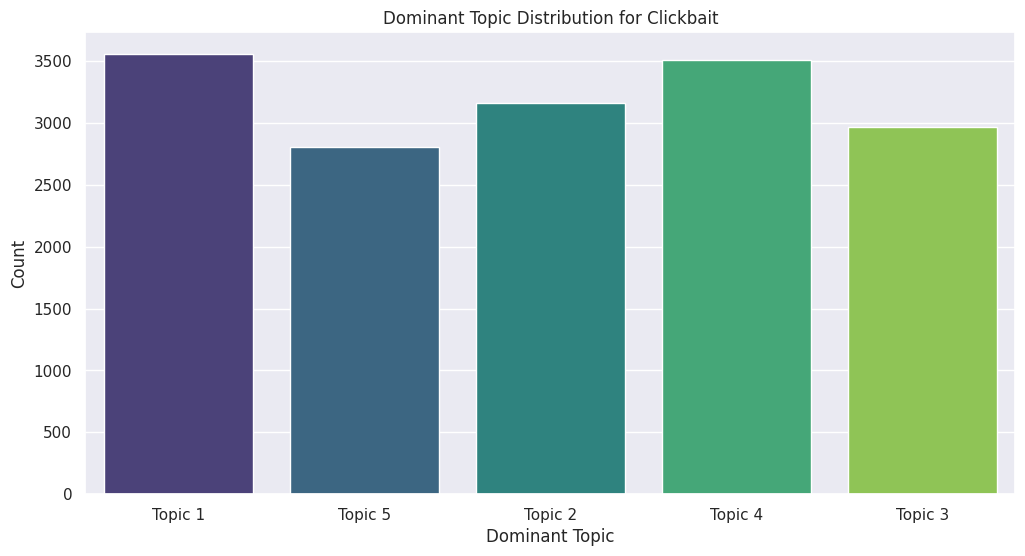

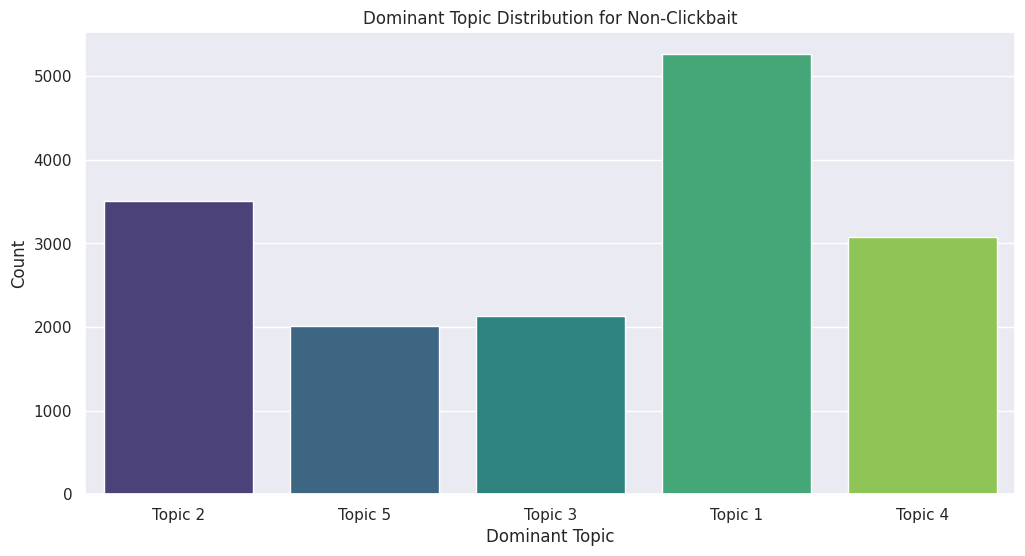

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize topic distribution
def visualize_topic_distribution(topic_assignments, category_name):
    topic_distribution = pd.DataFrame(topic_assignments, columns=[f'Topic {i+1}' for i in range(topic_assignments.shape[1])])
    topic_distribution['Dominant Topic'] = topic_distribution.idxmax(axis=1)

    # Plot the distribution of dominant topics
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Dominant Topic', data=topic_distribution, palette='viridis')
    plt.title(f"Dominant Topic Distribution for {category_name}")
    plt.xlabel('Dominant Topic')
    plt.ylabel('Count')
    plt.show()

# Visualize dominant topic distribution for clickbait headlines
visualize_topic_distribution(clickbait_topic_assignments, 'Clickbait')

# Visualize dominant topic distribution for non-clickbait headlines
visualize_topic_distribution(non_clickbait_topic_assignments, 'Non-Clickbait')


Comparative Analysis of Dominant Topics:
         Clickbait  Non-Clickbait
Topic 1       3555           5784
Topic 4       3512           3024
Topic 2       3161           2784
Topic 3       2964           2792
Topic 5       2807           1617

Topic #1 Top Words:
['life', 'thing', 'like', 'photo', 'say', 'look', 'halloween', 'really', 'dog', 'harry']

Topic #2 Top Words:
['make', 'people', 'time', 'tweet', 'laugh', 'hilarious', 'cat', 'feel', 'celebrity', 'thing']

Topic #3 Top Words:
['way', 'best', 'reason', 'day', 'friend', 'real', 'movie', 'actually', 'video', 'watch']

Topic #4 Top Words:
['actually', 'new', 'woman', 'thing', 'try', 'people', 'love', 'year', 'need', 'gift']

Topic #5 Top Words:
['know', 'base', 'sign', 'character', 'thing', 'zodiac', 'girl', 'favorite', 'guess', 'star']


<Figure size 1200x600 with 0 Axes>

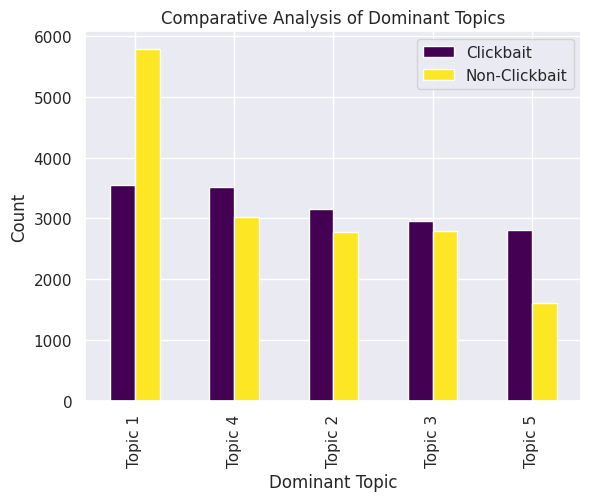

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Compare the dominant topics between clickbait and non-clickbait categories.
def compare_topics(lda_model, vectorizer, clickbait_texts, non_clickbait_texts):
    def assign_topics(lda_model, vectorizer, texts):
        term_matrix = vectorizer.transform(texts)
        topic_assignments = lda_model.transform(term_matrix)
        return topic_assignments

    clickbait_topic_assignments = assign_topics(lda_model, vectorizer, clickbait_texts)
    non_clickbait_topic_assignments = assign_topics(lda_model, vectorizer, non_clickbait_texts)

    clickbait_topic_distribution = pd.DataFrame(clickbait_topic_assignments, columns=[f'Topic {i+1}' for i in range(clickbait_topic_assignments.shape[1])])
    non_clickbait_topic_distribution = pd.DataFrame(non_clickbait_topic_assignments, columns=[f'Topic {i+1}' for i in range(non_clickbait_topic_assignments.shape[1])])

    clickbait_topic_distribution['Dominant Topic'] = clickbait_topic_distribution.idxmax(axis=1)
    non_clickbait_topic_distribution['Dominant Topic'] = non_clickbait_topic_distribution.idxmax(axis=1)

    print("Comparative Analysis of Dominant Topics:")
    comparison_df = pd.concat([clickbait_topic_distribution['Dominant Topic'].value_counts(), non_clickbait_topic_distribution['Dominant Topic'].value_counts()], axis=1, keys=['Clickbait', 'Non-Clickbait'])
    print(comparison_df)

    # Print the top words for each topic
    feature_names = vectorizer.get_feature_names_out()
    for i, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[-10:][::-1]
        top_words = [feature_names[idx] for idx in top_words_idx]
        print(f"\nTopic #{i + 1} Top Words:")
        print(top_words)

    # Plot the comparison
    plt.figure(figsize=(12, 6))
    comparison_df.plot(kind='bar', colormap='viridis')
    plt.title("Comparative Analysis of Dominant Topics")
    plt.xlabel('Dominant Topic')
    plt.ylabel('Count')
    plt.show()

# Compare dominant topics between clickbait and non-clickbait
compare_topics(clickbait_lda, vectorizer, clickbait_texts, non_clickbait_texts)


In [ ]:
import pandas as pd
import spacy

# Assuming 'df' is your DataFrame with 'text' and 'label' columns
# You may need to install the 'spacy' library and download the English language model using: python -m spacy download en_core_web_sm

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Function to apply NER to a text and extract entities
def apply_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to clickbait content
clickbait_df['entities'] = clickbait_df['headline'].apply(apply_ner)

# Apply NER to non-clickbait content
non_clickbait_df['entities'] = non_clickbait_df['headline'].apply(apply_ner)

# Display entities in clickbait headlines
print("Entities in Clickbait Headlines:")
print(clickbait_df[['text', 'entities']])

# Display entities in non-clickbait headlines
print("\nEntities in Non-Clickbait Headlines:")
print(non_clickbait_df[['text', 'entities']])


<ipython-input-31-93ec2e07b3da>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickbait_df['entities'] = clickbait_df['headline'].apply(apply_ner)


Entities in Clickbait Headlines:
                                                    text  \
0                                     Should I Get Bings   
1          Which TV Female Friend Group Do You Belong In   
2      The New "Star Wars: The Force Awakens" Trailer...   
3      This Vine Of New York On "Celebrity Big Brothe...   
4      A Couple Did A Stunning Photo Shoot With Their...   
...                                                  ...   
15994  There Was A Mini "Sisterhood Of The Traveling ...   
15995    21 Dogs Who Are Thankful For Their Best Friends   
15996  People Are Proving No Dick Is Too Big By Dropp...   
15997                        I'm An Atheist, But I'm Not   
15998  An Artist Drew Disney Men As Justin Bieber And...   

                             entities  
0                                  []  
1                                  []  
2                                  []  
3                   [(new york, GPE)]  
4                                  []  
...   

<ipython-input-31-93ec2e07b3da>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_clickbait_df['entities'] = non_clickbait_df['headline'].apply(apply_ner)


In [ ]:

# Count the number of empty lists in the 'your_column' column
num_empty_lists = clickbait_df['entities'].apply(lambda x: len(x) == 0).sum()

print(f"Number of empty lists in 'your_column': {num_empty_lists}")

# Count the number of empty lists in the 'your_column' column
num_empty_lists = non_clickbait_df['entities'].apply(lambda x: len(x) == 0).sum()

print(f"Number of empty lists in 'your_column': {num_empty_lists}")


Number of empty lists in 'your_column': 10814
Number of empty lists in 'your_column': 4860


<ipython-input-34-3c7d3fb39070>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickbait_df['pos_tags'] = clickbait_df['headline'].apply(apply_pos_tagging)
<ipython-input-34-3c7d3fb39070>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_clickbait_df['pos_tags'] = non_clickbait_df['headline'].apply(apply_pos_tagging)


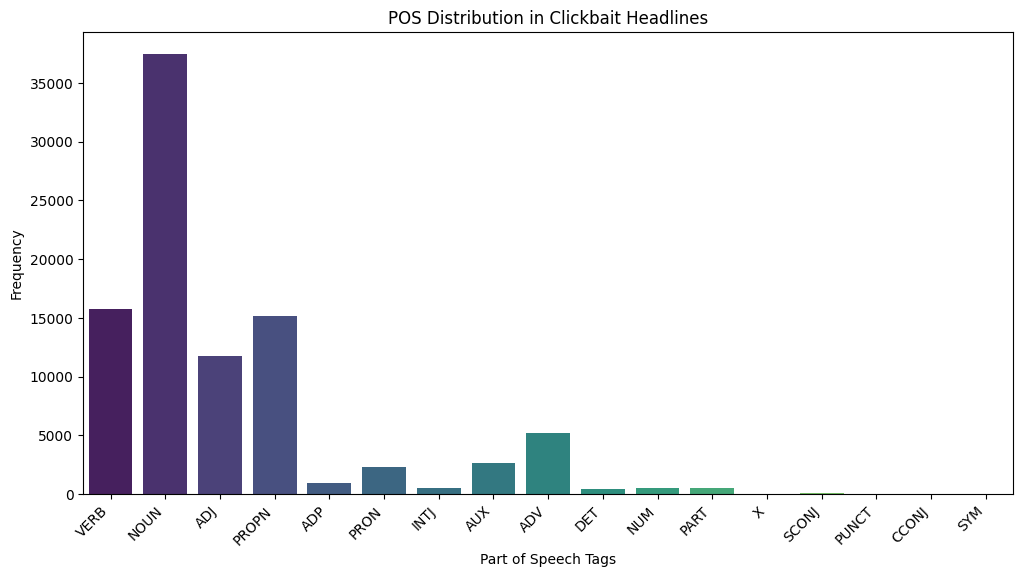

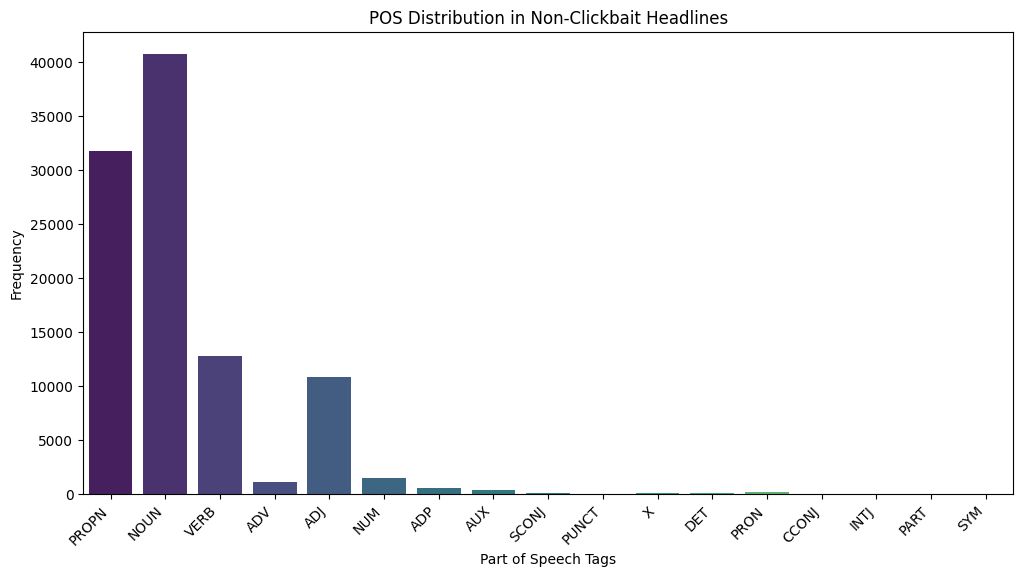

In [ ]:
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'text' and 'label' columns
# You may need to install the 'spacy' library and download the English language model using: python -m spacy download en_core_web_sm

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Function to apply POS tagging to a text and extract POS tags
def apply_pos_tagging(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    return pos_tags

# Apply POS tagging to clickbait content
clickbait_df['pos_tags'] = clickbait_df['headline'].apply(apply_pos_tagging)

# Apply POS tagging to non-clickbait content
non_clickbait_df['pos_tags'] = non_clickbait_df['headline'].apply(apply_pos_tagging)

from collections import Counter

# Function to plot the distribution of POS tags
def plot_pos_distribution(pos_tags, title):
    # Count the occurrences of each POS tag
    pos_counter = Counter(pos_tags)

    # Create a DataFrame from the Counter
    pos_df = pd.DataFrame.from_dict(pos_counter, orient='index', columns=['Frequency']).reset_index()
    pos_df.rename(columns={'index': 'POS Tag'}, inplace=True)

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x='POS Tag', y='Frequency', data=pos_df, palette="viridis")
    plt.title(title)
    plt.xlabel("Part of Speech Tags")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()

# Plot POS distribution for clickbait headlines
plot_pos_distribution([pos for pos_tags in clickbait_df['pos_tags'] for pos in pos_tags], "POS Distribution in Clickbait Headlines")

# Plot POS distribution for non-clickbait headlines
plot_pos_distribution([pos for pos_tags in non_clickbait_df['pos_tags'] for pos in pos_tags], "POS Distribution in Non-Clickbait Headlines")


<ipython-input-39-c436f116c0ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickbait_df['question_exclamation_counts'] = clickbait_df['text'].apply(count_question_exclamation)
<ipython-input-39-c436f116c0ee>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_clickbait_df['question_exclamation_counts'] = non_clickbait_df['text'].apply(count_question_exclamation)


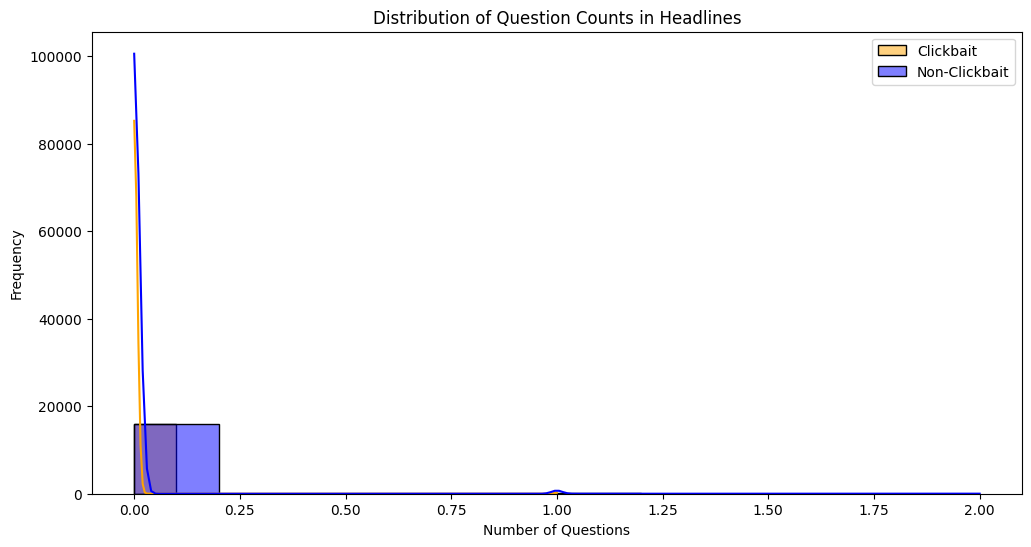

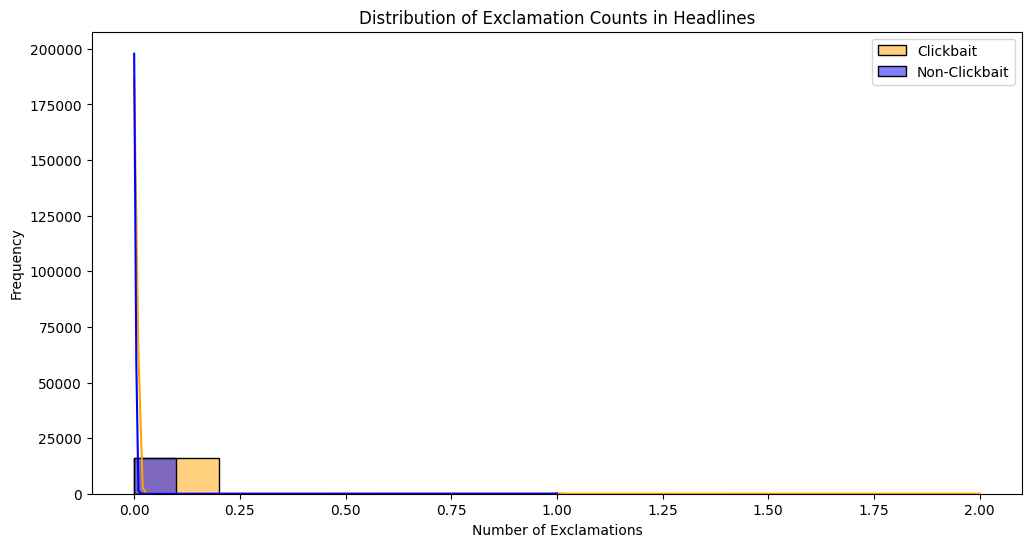

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'text' and 'label' columns

# Function to count the occurrences of questions and exclamation marks in a text
def count_question_exclamation(text):
    question_count = text.count('?')
    exclamation_count = text.count('!')
    return question_count, exclamation_count


# Apply the function to clickbait content
clickbait_df['question_exclamation_counts'] = clickbait_df['text'].apply(count_question_exclamation)

# Apply the function to non-clickbait content
non_clickbait_df['question_exclamation_counts'] = non_clickbait_df['text'].apply(count_question_exclamation)

# Extract counts for plotting
clickbait_question_counts = clickbait_df['question_exclamation_counts'].apply(lambda x: x[0])
clickbait_exclamation_counts = clickbait_df['question_exclamation_counts'].apply(lambda x: x[1])

non_clickbait_question_counts = non_clickbait_df['question_exclamation_counts'].apply(lambda x: x[0])
non_clickbait_exclamation_counts = non_clickbait_df['question_exclamation_counts'].apply(lambda x: x[1])

# Plot the distribution of question counts
plt.figure(figsize=(12, 6))
sns.histplot(clickbait_question_counts, bins=10, kde=True, color='orange', label='Clickbait')
sns.histplot(non_clickbait_question_counts, bins=10, kde=True, color='blue', label='Non-Clickbait')
plt.title('Distribution of Question Counts in Headlines')
plt.xlabel('Number of Questions')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the distribution of exclamation counts
plt.figure(figsize=(12, 6))
sns.histplot(clickbait_exclamation_counts, bins=10, kde=True, color='orange', label='Clickbait')
sns.histplot(non_clickbait_exclamation_counts, bins=10, kde=True, color='blue', label='Non-Clickbait')
plt.title('Distribution of Exclamation Counts in Headlines')
plt.xlabel('Number of Exclamations')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Frequency (Y-axis):

# This represents how often a particular count of questions or exclamations occurs in the dataset.
# Each bar in the histogram corresponds to a range of question or exclamation counts, and the height of the bar indicates how many headlines fall within that range.
# Number of Questions (X-axis):

# This axis represents the count of questions or exclamations in the headlines.
# For example, if you have a bar at X=3, it means that there are headlines with exactly 3 questions or exclamations in the dataset.
# Explanation:

# The histograms provide a visual representation of the distribution of question and exclamation counts in both clickbait and non-clickbait headlines.
# Each histogram has two sets of bars, one for clickbait headlines (in orange) and one for non-clickbait headlines (in blue).
# By comparing the two histograms, you can observe patterns and differences in the usage of questions and exclamations between clickbait and non-clickbait headlines.

In [ ]:
import pandas as pd

# Assuming you have the following counts
data = {
    'Question Counts (Clickbait)': clickbait_question_counts.values,
    'Question Counts (Non-Clickbait)': non_clickbait_question_counts.values,
}

data2 = {'Exclamation Counts (Clickbait)': clickbait_exclamation_counts.values,
         'Exclamation Counts (Non-Clickbait)': non_clickbait_exclamation_counts.values,
         }

# Ensure arrays have the same length by truncating to the minimum length
min_length = min(len(data['Question Counts (Clickbait)']), len(data['Question Counts (Non-Clickbait)']))
data['Question Counts (Clickbait)'] = data['Question Counts (Clickbait)'][:min_length]
data['Question Counts (Non-Clickbait)'] = data['Question Counts (Non-Clickbait)'][:min_length]

min_length2 = min(len(data2['Exclamation Counts (Clickbait)']), len(data2['Exclamation Counts (Non-Clickbait)']))
data2['Exclamation Counts (Clickbait)'] = data2['Exclamation Counts (Clickbait)'][:min_length2]
data2['Exclamation Counts (Non-Clickbait)'] = data2['Exclamation Counts (Non-Clickbait)'][:min_length2]

df_summary = pd.DataFrame(data)

# Display the summary table
print(df_summary.describe())


       Question Counts (Clickbait)  Question Counts (Non-Clickbait)
count                 15999.000000                     15999.000000
mean                      0.002688                         0.007438
std                       0.051775                         0.087368
min                       0.000000                         0.000000
25%                       0.000000                         0.000000
50%                       0.000000                         0.000000
75%                       0.000000                         0.000000
max                       1.000000                         2.000000


<ipython-input-37-fb8a89903ff9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickbait_df['average_vector'] = clickbait_df['headline'].apply(get_average_vector)
<ipython-input-37-fb8a89903ff9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_clickbait_df['average_vector'] = non_clickbait_df['headline'].apply(get_average_vector)


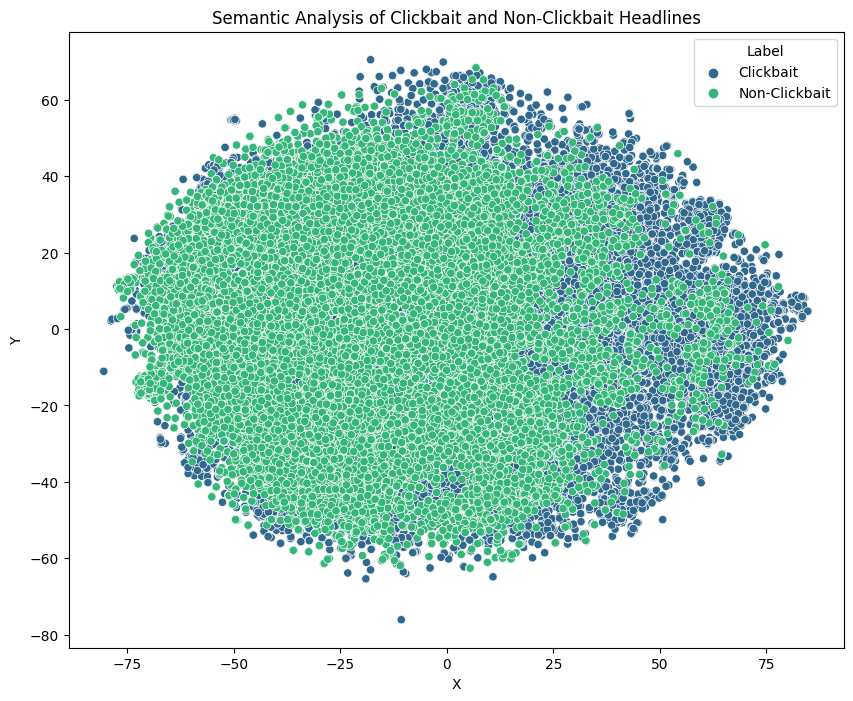

In [ ]:
import numpy as np
nlp = spacy.load("en_core_web_sm")
# Function to get the average vector for a text using spaCy's word embeddings
def get_average_vector(text):
    doc = nlp(text)
    # Filter out stopwords and punctuation
    tokens = [token.vector for token in doc if not token.is_stop and not token.is_punct]
    if tokens:
        return np.mean(tokens, axis=0)
    else:
        return np.zeros(300)  # Return a zero vector if no valid tokens

# Apply the function to clickbait content
clickbait_df['average_vector'] = clickbait_df['headline'].apply(get_average_vector)

# Apply the function to non-clickbait content
non_clickbait_df['average_vector'] = non_clickbait_df['headline'].apply(get_average_vector)

# Extract vectors for clickbait and non-clickbait headlines
clickbait_vectors = list(clickbait_df['average_vector'])
non_clickbait_vectors = list(non_clickbait_df['average_vector'])

# Ensure that all vectors have the same length
vector_length = len(clickbait_vectors[0])  # Assuming all vectors have the same length
clickbait_vectors = [vec if len(vec) == vector_length else np.zeros(vector_length) for vec in clickbait_vectors]
non_clickbait_vectors = [vec if len(vec) == vector_length else np.zeros(vector_length) for vec in non_clickbait_vectors]

# Combine vectors for analysis
all_vectors_array = np.array(clickbait_vectors + non_clickbait_vectors)
labels = ['Clickbait'] * len(clickbait_vectors) + ['Non-Clickbait'] * len(non_clickbait_vectors)

# Perform semantic analysis using t-SNE for dimensionality reduction
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
embedded_vectors = tsne.fit_transform(all_vectors_array)

# Create a DataFrame for visualization
df_visualization = pd.DataFrame({
    'X': embedded_vectors[:, 0],
    'Y': embedded_vectors[:, 1],
    'Label': labels
})

# Plot the semantic analysis results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X', y='Y', hue='Label', data=df_visualization, palette='viridis')
plt.title('Semantic Analysis of Clickbait and Non-Clickbait Headlines')
plt.show()


<ipython-input-47-35818d2dc197>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickbait_df['average_vector'] = clickbait_df['text'].apply(get_average_vector)
<ipython-input-47-35818d2dc197>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_clickbait_df['average_vector'] = non_clickbait_df['text'].apply(get_average_vector)


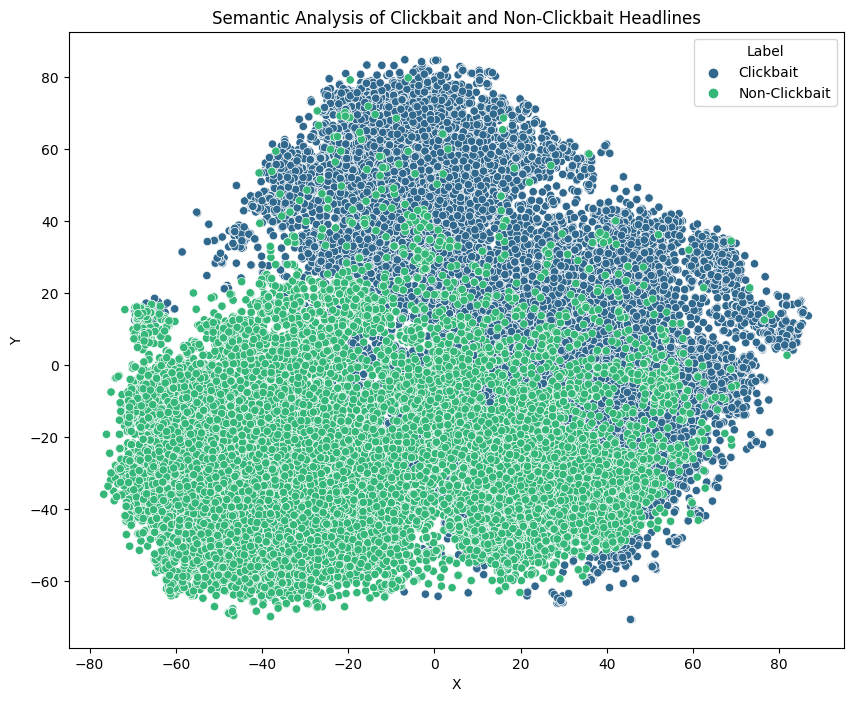

In [ ]:
import numpy as np
nlp = spacy.load("en_core_web_sm")
# Function to get the average vector for a text using spaCy's word embeddings
def get_average_vector(text):
    doc = nlp(text)
    # Filter out stopwords and punctuation
    tokens = [token.vector for token in doc if not token.is_stop and not token.is_punct]
    if tokens:
        return np.mean(tokens, axis=0)
    else:
        return np.zeros(300)  # Return a zero vector if no valid tokens

# Apply the function to clickbait content
clickbait_df['average_vector'] = clickbait_df['text'].apply(get_average_vector)

# Apply the function to non-clickbait content
non_clickbait_df['average_vector'] = non_clickbait_df['text'].apply(get_average_vector)

# Extract vectors for clickbait and non-clickbait headlines
clickbait_vectors = list(clickbait_df['average_vector'])
non_clickbait_vectors = list(non_clickbait_df['average_vector'])

# Ensure that all vectors have the same length
vector_length = len(clickbait_vectors[0])  # Assuming all vectors have the same length
clickbait_vectors = [vec if len(vec) == vector_length else np.zeros(vector_length) for vec in clickbait_vectors]
non_clickbait_vectors = [vec if len(vec) == vector_length else np.zeros(vector_length) for vec in non_clickbait_vectors]

# Combine vectors for analysis
all_vectors_array = np.array(clickbait_vectors + non_clickbait_vectors)
labels = ['Clickbait'] * len(clickbait_vectors) + ['Non-Clickbait'] * len(non_clickbait_vectors)

# Perform semantic analysis using t-SNE for dimensionality reduction
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
embedded_vectors = tsne.fit_transform(all_vectors_array)

# Create a DataFrame for visualization
df_visualization = pd.DataFrame({
    'X': embedded_vectors[:, 0],
    'Y': embedded_vectors[:, 1],
    'Label': labels
})

# Plot the semantic analysis results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X', y='Y', hue='Label', data=df_visualization, palette='viridis')
plt.title('Semantic Analysis of Clickbait and Non-Clickbait Headlines')
plt.show()


In [ ]:
train_df

text  label  \
25161  Soccer Provides Oasis in Mexican City Ravaged ...      0   
8676                                     Guys Try Tinder      1   
27364  Five police officers injured in Naples protest...      0   
265    Michael B. Jordan Got Laid The Fuck Out While ...      1   
22727  International experts probe deadly Ebola Resto...      0   
...                                                  ...    ...   
29802  Rocket strike near hotel in Afghan capital inj...      0   
5390   How Well Do You Remember The First Episode Of ...      1   
860    16 Photos From The Delhi Queer Pride Parade Th...      1   
15795             33 Of The Most Canadian Sentences Ever      1   
23654  Man killed after shop robbery in West Yorkshir...      0   

                                                headline  sentiment  \
25161  soccer provide oasis mexican city ravage drug war   0.000000   
8676                                      guy try tinder   0.000000   
27364  five police officer injured naples protest new...   0.136364   
265            michael b jordan get laid fuck film creed  -0.400000   
22727  international expert probe deadly ebola reston...  -0.100000   
...                                                  ...        ...   
29802  rocket strike near hotel afghan capital injure...   0.100000   
5390                well remember first episode house md   0.250000   
860    photo delhi queer pride parade restore faith h...  -0.250000   
15795                             canadian sentence ever   0.000000   
23654  man kill shop robbery west yorkshire england m...   0.000000   

       flesch_kincaid_grade  gunning_fog  coleman_liau  punctuation_counts  \
25161                   8.8         8.20         10.80                   0   
8676                    0.9         1.20         -2.38                   0   
27364                   4.4         3.60         13.19                   0   
265                     0.5         3.20          5.00                   3   
22727                  11.9         8.00         20.10                   0   
...                     ...          ...           ...                 ...   
29802                   6.4         3.20         13.01                   0   
5390                    2.1         2.40          9.15                   5   
860                    10.0         8.20         13.70                   0   
15795                  12.7        14.53         13.12                   0   
23654                   9.6         8.00         17.78                   2   

       url_counts                                             vector  
25161           0  [-0.00048444048, 0.8692007, -0.06375751, 0.464...  
8676            0  [-0.086282454, 0.0027494293, 0.12106833, -0.07...  
27364           0  [0.017493231, 1.0061069, -0.08637126, 0.537029...  
265             0  [-0.15777144, 0.09657902, 0.1764009, -0.003798...  
22727           0  [0.007595502, 0.519722, -0.04257065, 0.2736012...  
...           ...                                                ...  
29802           0  [0.016937435, 0.8353689, -0.0743283, 0.4432404...  
5390            0  [-0.4840566, -0.12233672, 0.5605278, -0.187491...  
860             0  [-0.13106188, -0.12662804, 0.22995062, -0.2080...  
15795           0  [-0.34362295, 0.18785064, 0.37189773, -0.02024...  
23654           0  [0.026461383, 1.0315394, -0.100031406, 0.54505...  

[25600 rows x 10 columns]

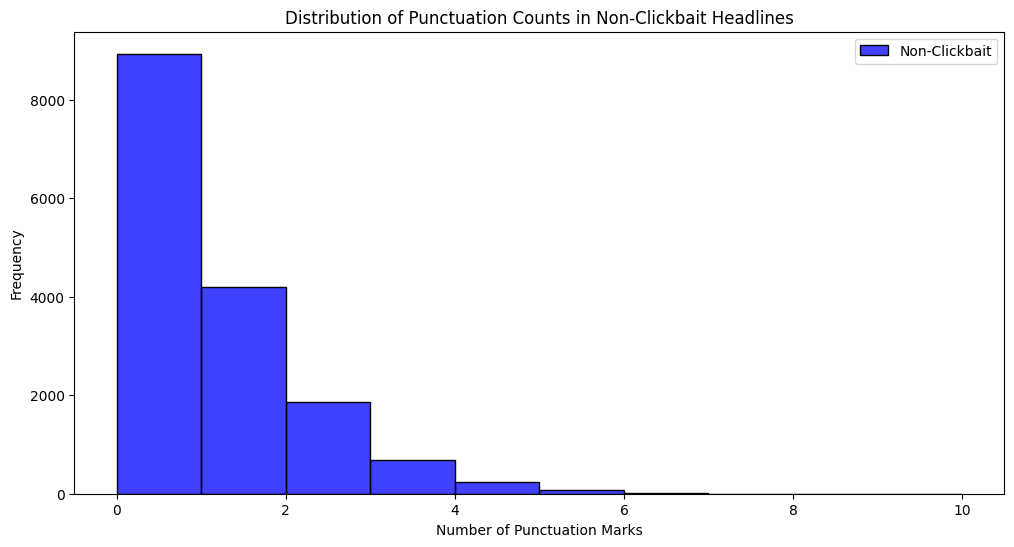

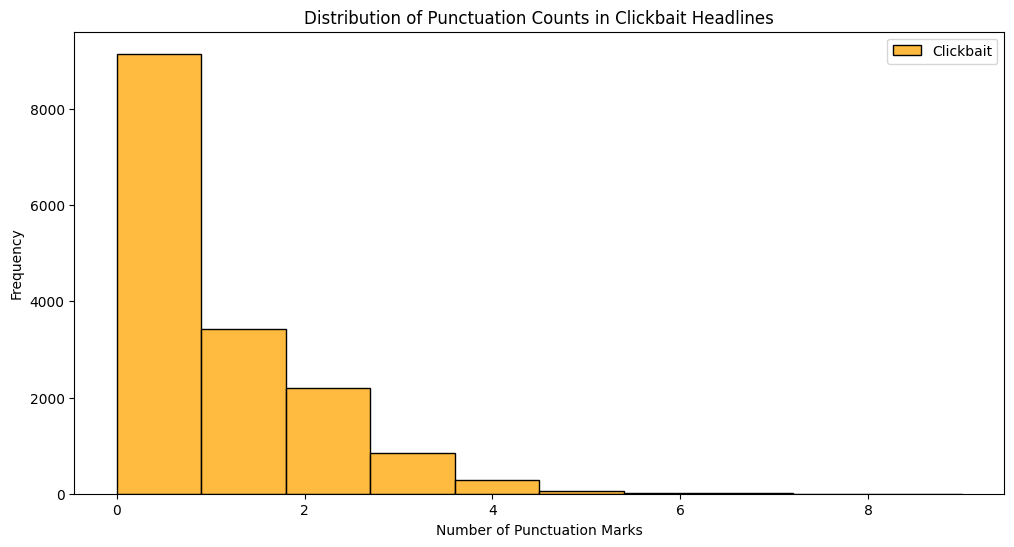

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

# Assuming 'df' is your DataFrame with 'text' and 'label' columns

# Function to count the occurrences of punctuation marks in a text
def count_punctuation(text):
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    return punctuation_count

# Apply the function to the entire dataset
df['punctuation_counts'] = df['text'].apply(count_punctuation)

# Filter the dataframe for label = 0 (non-clickbait)
non_clickbait_df = df[df['label'] == 0]

# Filter the dataframe for label = 1 (clickbait)
clickbait_df = df[df['label'] == 1]

# Plot the distribution of punctuation counts with legend for non-clickbait headlines
plt.figure(figsize=(12, 6))
sns.histplot(data=non_clickbait_df, x='punctuation_counts', bins=10, color='blue', label='Non-Clickbait')
plt.title('Distribution of Punctuation Counts in Non-Clickbait Headlines')
plt.xlabel('Number of Punctuation Marks')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Plot the distribution of punctuation counts with legend for clickbait headlines
plt.figure(figsize=(12, 6))
sns.histplot(data=clickbait_df, x='punctuation_counts', bins=10, color='orange', label='Clickbait')
plt.title('Distribution of Punctuation Counts in Clickbait Headlines')
plt.xlabel('Number of Punctuation Marks')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()
